# Feature engineering with Python

## Introduction

Throughout this notebook, we will learn to use Python to perform feature engineering on a dataset to prepare it for modeling using a supervised classification model. Before getting started, watch the associated instructional video and complete the in-video question. All of the code we will be implementing and related instructions are contained in this notebook.

## Overview
The data we will use in this notebook is customer data from a European bank. We will return to this data often throughout this course. Later, we will compare the performance of different models on this data. Be sure to review the [data dictionary](https://www.coursera.org/learn/the-nuts-and-bolts-of-machine-learning/supplement/s7Mux/follow-along-instructions-feature-engineering-with-python) to better acquaint yourself with it.

The data will be used to predict whether a customer of the bank will churn. If a customer churns, it means they left the bank and took their business elsewhere. If you can predict which customers are likely to churn, you can take measures to retain them before they do.

Topics of focus in this activity include:

  * **Feature selection**
    * Removing uninformative features
  * **Feature extraction**
    * Creating new features from existing features
  * **Feature transformation**
    * Modifying existing features to better suit our objectives
    * Encoding of categorical features as dummies

## Import packages and libraries
First, we will need to import all the required libraries and extensions. Throughout the course, we will be using numpy and pandas for operations.

In [ ]:
import numpy as np
import pandas as pd

## Target variable

The data dictionary shows that there is a column called `Exited`. This is a Boolean value that indicates whether or not a customer left the bank (0 = did not leave, 1 = did leave). This will be our target variable. In other words, for each customer, our model should predict whether they should have a 0 or a 1 in the `Exited` column.

This is a supervised learning classification task because we will predict on a binary class. Therefore, this notebook will prepare the data for a classification model.

In [ ]:
# Read in data
df_original = pd.read_csv('Churn_Modelling.csv')

In [ ]:
df_original.head()

When modeling, a best practice is to perform a rigorous examination of the data before beginning feature engineering and feature selection. Not only does this process help you understand your data, what it is telling you, and what it is not telling you, but it also can give you clues that help you create new features.

You have already learned the fundamentals of exploratory data analysis (EDA), so this notebook will skip that essential part of the modeling process. Just remember that a good data science project will always include EDA.

The following table provides a quick overview of the data

In [ ]:
# Print high-level info about data
df_original.info()

From this table, we can confirm that the data has 14 features and 10,000 observations. We also know that nine features are integers, two are floats, and three are strings. Finally, we can tell that there are no null values because there are 10,000 observations, and each column has 10,000 non-null values.

## Feature engineering

###Feature selection

Feature selection is the process of choosing features to be used for modeling. In practice, feature selection takes place at multiple points in the PACE process. Although sometimes you will be given a dataset and a defined target variable, most often in practice you will begin with only a question or a problem that you are tasked with solving. In these cases, if you decide that the problem requires a model, you will then have to:

* Consider what data is available to you
* Decide on what kind of model you need
* Decide on a target variable
* Assemble a collection of features that you think might help predict on your chosen target

This all takes place during the **Plan** phase.

Then, during the **Analyze** phase, you perform EDA on the data and reevaluate your variables for appropriateness. For example, can your model handle null values? If not, what do you do with features with a lot of nulls? Perhaps you drop them. This too is feature selection.

Feature selection also occurs during the **Construct** phase. This usually involves building a model, examining which features are most predictive, and then removing the unpredictive features.

There's a lot of work involved in feature selection. In this case, we already have a dataset, and we are not performing thorough EDA on it. However, we can still examine the data to ensure that all the features can reasonably be expected to have predictive potential.

Returning to the bank data, notice that the first column is called `RowNumber`, and it just enumerates the rows. We should drop this feature, because row number shouldn't have any correlation with whether or not a customer churned.

The same is true for `CustomerID`, which appears to be a number assigned to the customer for administrative purposes, and `Surname`, which is the customer's last name. Since these cannot be expected to have any influence over the target variable, we can remove them from the modeling dataset.

Finally, for ethical reasons, we should remove the `Gender` column. The reason for doing this is that we don't want our model-making predictions (and therefore, offering promotions/financial incentives) based on a person's gender.

In [ ]:
# Create a new df that drops RowNumber, CustomerId, Surname, and Gender cols
churn_df = df_original.drop(['RowNumber', 'CustomerId', 'Surname', 'Gender'],
                            axis=1)

In [ ]:
churn_df.head()

### Feature extraction

Depending on your data, you may be able to create brand new features from your existing features. Oftentimes, features that you create yourself are some of the most important features selected by your model. Usually this is the case when you have both domain knowledge for the problem you're solving and the right combinations of data.

For example, suppose you knew that your bank had a computer glitch that caused many credit card transactions to be mistakenly declined in October. It would be reasonable to suspect that people who experienced this might be at increased risk of leaving the bank. If you had a feature that represented each customer's number of credit card transactions each month, you could create a new feature; for example, `OctUseRatio`, where:

$$\text{OctUseRatio} = \frac{\text{num of Oct. transactions}}{\text{avg num monthly transactions}}$$
  </br>

This new feature would then give you a ratio that might be indicative of whether the customer experienced declined transactions.

We don't have this kind of specific circumstantial knowledge, and we don't have many features to choose from, but we can create a new feature that might help improve the model.



Let's create a `Loyalty` feature that represents the percentage of each customer's life that they were customers. We can do this by dividing `Tenure` by `Age`:

$$\text{Loyalty} = \frac{\text{Tenure}}{\text{Age}}$$
  </br>
The intuition here is that people who have been customers for a greater proportion of their lives might be less likely to churn.

In [ ]:
# Create Loyalty variable
churn_df['Loyalty'] = churn_df['Tenure'] / churn_df['Age']

In [ ]:
churn_df.head()

### Feature transformation

The next step is to transform our features to get them ready for modeling. Different models have different requirements for how the data should be prepared and also different assumptions about their distributions, independence, and so on. You learned about some of these already for linear and logistic regression, and you will continue learning about them as you encounter new modeling techniques.

The models we will be building with this data are all classification models, and classification models generally need categorical variables to be encoded. Our dataset has one categorical feature: `Geography`. Let's check how many categories appear in the data for this feature.

In [ ]:
# Print unique values of Geography col
churn_df['Geography'].unique()

There are three unique values: France, Spain, and Germany. Encode this data so it can be represented using Boolean features. We will use a pandas function called `pd.get_dummies()` to do this.

When we call `pd.get_dummies()` on this feature, it will replace the `Geography` column with three new Boolean columns--one for each possible category contained in the column being dummied.

When we specify `drop_first=True` in the function call, it means that instead of replacing `Geography` with three new columns, it will instead replace it with two columns. We can do this because no information is lost from this, but the dataset is shorter and simpler.  

In this case, we end up with two new columns called `Geography_Germany` and `Geography_Spain`. We don't need a `Geography_France` column, because if a customer's values in `Geography_Germany` and `Geography_Spain` are both 0, we will know they are from France!

In [ ]:
# Dummy encode categorical variables
churn_df = pd.get_dummies(churn_df, drop_first=True)

In [ ]:
churn_df.head()

We can now use our new dataset to build a model.

## Conclusion
You now understand how to use Python to perform feature engineering on a dataset to prepare it for modeling. Going forward, you can start using Python to perform feature engineering on your own data.

# Perform feature engineering

## **Introduction**


As you're learning, data professionals working on modeling projects use featuring engineering to help them determine which attributes in the data can best predict certain measures.

In this activity, you are working for a firm that provides insights to the National Basketball Association (NBA), a professional North American basketball league. You will help NBA managers and coaches identify which players are most likely to thrive in the high-pressure environment of professional basketball and help the team be successful over time.

To do this, you will analyze a subset of data that contains information about NBA players and their performance records. You will conduct feature engineering to determine which features will most effectively predict whether a player's NBA career will last at least five years. The insights gained then will be used in the next stage of the project: building the predictive model.



## Step 1: Imports

In [ ]:
import pandas as pd

In [ ]:
# Save in a variable named `data`.

data = pd.read_csv("nba-players.csv", index_col=0)

## Step 2: Data exploration

In [ ]:
data.head(10)

In [ ]:
data.shape

**Question:** What do you observe about the number of rows and the number of columns in the data?
- There are 1,340 rows and 21 columns in the data.

In [ ]:
# Display all column names.

data.columns

The following table provides a description of the data in each column. This metadata comes from the data source, which is listed in the references section of this lab.

<center>

|Column Name|Column Description|
|:---|:-------|
|`name`|Name of NBA player|
|`gp`|Number of games played|
|`min`|Number of minutes played per game|
|`pts`|Average number of points per game|
|`fgm`|Average number of field goals made per game|
|`fga`|Average number of field goal attempts per game|
|`fg`|Average percent of field goals made per game|
|`3p_made`|Average number of three-point field goals made per game|
|`3pa`|Average number of three-point field goal attempts per game|
|`3p`|Average percent of three-point field goals made per game|
|`ftm`|Average number of free throws made per game|
|`fta`|Average number of free throw attempts per game|
|`ft`|Average percent of free throws made per game|
|`oreb`|Average number of offensive rebounds per game|
|`dreb`|Average number of defensive rebounds per game|
|`reb`|Average number of rebounds per game|
|`ast`|Average number of assists per game|
|`stl`|Average number of steals per game|
|`blk`|Average number of blocks per game|
|`tov`|Average number of turnovers per game|
|`target_5yrs`|1 if career duration >= 5 yrs, 0 otherwise|

</center>

In [ ]:
# Use .info() to display a summary of the DataFrame.

data.info()

**Question:** Based on the preceding tables, which columns are numerical and which columns are categorical?
- Based on the preceding tables, the `name` column is categorical, and the rest of the columns are numerical.

### Check for missing values
Now, review the data to determine whether it contains any missing values. Begin by displaying the number of missing values in each column. After that, use isna() to check whether each value in the data is missing. Finally, use sum() to aggregate the number of missing values per column.

In [ ]:
# Display the number of missing values in each column.
# Check whether each value is missing.
#Aggregate the number of missing values per column.

### YOUR CODE HERE ###

data.isna().sum()

**Question:** What do you observe about the missing values in the columns?
All columns in this dataset have 0 missing values.

**Question:** Why is it important to check for missing values?
Checking for missing values is an important step in data exploration. Missing values are not particularly useful, so it's important to handle them by cleaning the data.

## Step 3: Statistical tests

Next, use a statistical technique to check the class balance in the data. To understand how balanced the dataset is in terms of class, display the percentage of values that belong to each class in the target column. In this context, class 1 indicates an NBA career duration of at least five years, while class 0 indicates an NBA career duration of less than five years.

In [ ]:
data["target_5yrs"].value_counts(normalize=True)*100

**Question:** What do you observe about the class balance in the target column?
- About 62% of the values in the target columm belong to class 1, and about 38% of the values belong to class 0. In other words, about 62% of players represented by this data have an NBA career duration of at least five years, and about 38% do not.
- The dataset is not perfectly balanced, but an exact 50-50 split is a rare occurance in datasets, and a 62-38 split is not too imbalanced. However, if the majority class made up 90% or more of the dataset, then that would be of concern, and it would be prudent to address that issue through techniques like upsampling and downsampling.

**Question:** Why is it important to check class balance?

If there is a lot more representation of one class than another, then the model may be biased toward the majority class. When this happens, the predictions may be inaccurate.

## Step 4: Results and Evaluation

Now, perform feature engineering, with the goal of identifying and creating features that will serve as useful predictors for the target variable, `target_5yrs`.

### Feature Selection

The following table contains descriptions of the data in each column:

<center>

|Column Name|Column Description|
|:---|:-------|
|`name`|Name of NBA player|
|`gp`|Number of games played|
|`min`|Number of minutes played|
|`pts`|Average number of points per game|
|`fgm`|Average number of field goals made per game|
|`fga`|Average number of field goal attempts per game|
|`fg`|Average percent of field goals made per game|
|`3p_made`|Average number of three-point field goals made per game|
|`3pa`|Average number of three-point field goal attempts per game|
|`3p`|Average percent of three-point field goals made per game|
|`ftm`|Average number of free throws made per game|
|`fta`|Average number of free throw attempts per game|
|`ft`|Average percent of free throws made per game|
|`oreb`|Average number of offensive rebounds per game|
|`dreb`|Average number of defensive rebounds per game|
|`reb`|Average number of rebounds per game|
|`ast`|Average number of assists per game|
|`stl`|Average number of steals per game|
|`blk`|Average number of blocks per game|
|`tov`|Average number of turnovers per game|
|`target_5yrs`|1 if career duration >= 5 yrs, 0 otherwise|

</center>

**Question:** Which columns would you select and avoid selecting as features, and why? Keep in mind the goal is to identify features that will serve as useful predictors for the target variable, `target_5yrs`.  

- You should avoid selecting the `name` column as a feature. A player's name is not helpful in determining their career duration. Moreover, it may not be ethical or fair to predict a player's career duration based on a name.
- The number of games a player has played in may not be as important in determining their career duration as the number of points they have earned. While you could say that someone who has played in more games may have more practice and experience, the points they earn during the games they played in would speak more to their performance as a player. This, in turn, would influence their career duration. So, the `gp` column on its own may not be a helpful feature. However, `gp` and `pts` could be combined to get the total number of points earned across the games played, and that result could be a helpful feature. That approach can be implemented later in the feature engineering process—in feature extraction.
- If the number of points earned across games will be extracted as a feature, then that could be combined with the number of minutes played across games (`min * gp`) to extract another feature. This could be a measure of players' efficiency and could help in predicting players' career duration. `min` on its own may not be useful as a feature for the same reason as `gp`.
- There are three different columns that give information about field goals. The percent of field goals a player makes (`fg`) says more about their performance than the number of field goals they make (`fgm`) or the number of field goals they attempt (`fga`). The percent gives more context, as it takes into account both how many field goals a player successfully made and how many field goals they attempted in total. This allows for a more meaningful comparison between players. The same logic applies to the percent of three-point field goals made, as well as the percent of free throws made.
- There are columns for the number offensive rebounds (`oreb`), the number of defensive rebounds (`dreb`), and the number of rebounds overall (`reb`). Because the overall number of rebounds should already incorporate both offensive and defensive rebounds, it would make sense to use the overall as a feature.
- The number of assists (`ast`), steals (`stl`), blocks (`blk`), and turnovers (`tov`) also provide information about how well players are performing in games, and thus, could be helpful in predicting how long players last in the league.

Therefore, at this stage of the feature engineering process, it would be most effective to select the following columns:

`gp`, `min`, `pts`, `fg`, `3p`, `ft`, `reb`, `ast`, `stl`, `blk`, `tov`.

Next, select the columns you want to proceed with. Make sure to include the target column, `target_5yrs`. Display the first few rows to confirm they are as expected.

In [ ]:
# Select the columns to proceed with and save the DataFrame in new variable `selected_data`.
# Include the target column, `target_5yrs`.

selected_data = data[["gp", "min", "pts", "fg", "3p", "ft", "reb", "ast", "stl", "blk", "tov", "target_5yrs"]]


# Display the first few rows.

selected_data.head()

### Feature transformation

An important aspect of feature transformation is feature encoding. If there are categorical columns that you would want to use as features, those columns should be transformed to be numerical. This technique is also known as feature encoding.

**Question:** Why is feature transformation important to consider? Are there any transformations necessary for the features you want to use?
- Many types of models are designed in a way that requires the data coming in to be numerical. So, transforming categorical features into numerical features is an important step.
- In this particular dataset, `name` is the only categorical column and the other columns are numerical (discussed in the exemplar response to Question 2). Given that `name` is not selected as a feature, all of the features that are selected at this point are already numerical and do not require transformation.

### Feature extraction


Display the first few rows containing containing descriptions of the data for reference. The table is as follows:

<center>

|Column Name|Column Description|
|:---|:-------|
|`name`|Name of NBA player|
|`gp`|Number of games played|
|`min`|Number of minutes played per game|
|`pts`|Average number of points per game|
|`fgm`|Average number of field goals made per game|
|`fga`|Average number of field goal attempts per game|
|`fg`|Average percent of field goals made per game|
|`3p_made`|Average number of three-point field goals made per game|
|`3pa`|Average number of three-point field goal attempts per game|
|`3p`|Average percent of three-point field goals made per game|
|`ftm`|Average number of free throws made per game|
|`fta`|Average number of free throw attempts per game|
|`ft`|Average percent of free throws made per game|
|`oreb`|Average number of offensive rebounds per game|
|`dreb`|Average number of defensive rebounds per game|
|`reb`|Average number of rebounds per game|
|`ast`|Average number of assists per game|
|`stl`|Average number of steals per game|
|`blk`|Average number of blocks per game|
|`tov`|Average number of turnovers per game|
|`target_5yrs`|1 if career duration >= 5 yrs, 0 otherwise|

</center>

In [ ]:
# Display the first few rows of `selected_data` for reference.

selected_data.head()

**Question:** Which columns lend themselves to feature extraction?

- The `gp`, `pts`, `min` columns lend themselves to feature extraction.
  - `gp` represents the total number of games a player has played in, and `pts` represents the average number of points the player has earned per game. It might be helpful to combine these columns to get the total number of points the player has earned across the games and use the result as a new feature, which could be added into a new column named `total_points`. The total points earned by a player can reflect their performance and shape their career longevity.
  - The `min` column represents the average number of minutes played per game. `total_points` could be combined with `min` and `gp` to extract a new feature: points earned per minute. This can be considered a measure of player efficiency, which could shape career duration. This feature can be added into a column named `efficiency`.

Extract two features that you think would help predict `target_5yrs`. Then, create a new variable named 'extracted_data' that contains features from 'selected_data', as well as the features being extracted.

In [ ]:
# Extract two features that would help predict target_5yrs.
# Create a new variable named `extracted_data`.

# Make a copy of `selected_data`
extracted_data = selected_data.copy()

# Add a new column named `total_points`;
# Calculate total points earned by multiplying the number of games played by the average number of points earned per game
extracted_data["total_points"] = extracted_data["gp"] * extracted_data["pts"]

# Add a new column named `efficiency`. Calculate efficiency by dividing the total points earned by the total number
# of minutes played, which yields points per minute. (Note that `min` represents avg. minutes per game.)
extracted_data["efficiency"] = extracted_data["total_points"] / (extracted_data["min"] * extracted_data["gp"])

# Display the first few rows of `extracted_data` to confirm that the new columns were added.
extracted_data.head()

Now, to prepare for the Naive Bayes model that you will build in a later lab, clean the extracted data and ensure ensure it is concise. Naive Bayes involves an assumption that features are independent of each other given the class. In order to satisfy that criteria, if certain features are aggregated to yield new features, it may be necessary to remove those original features. Therefore, drop the columns that were used to extract new features.

**Note:** There are other types of models that do not involve independence assumptions, so this would not be required in those instances. In fact, keeping the original features may be beneficial.

In [ ]:
# Remove any columns from `extracted_data` that are no longer needed.

# Remove `gp`, `pts`, and `min` from `extracted_data`.
extracted_data = extracted_data.drop(columns=["gp", "pts", "min"])

# Display the first few rows of `extracted_data` to ensure that column drops took place.

extracted_data.head()

In [ ]:
# Export the extracted data.

extracted_data.to_csv("extracted_nba_players_data.csv", index=0)

## **Considerations**


**What are some key takeaways that you learned during this lab?**
- It is important to check for class balance in a dataset, particularly in the context of feature engineering and predictive modeling. If the target column in a dataset has more than 90% of its values belonging to one class, it is recommended to redistribute the data; otherwise, once a model is trained on the imbalanced data and predictions are made, the predictions may be biased.
- Feature selection involves choosing features that help predict the target variable and removing columns that may not be helpful for prediction. In this process, and throughout feature engineering, it is important to make ethical considerations.  
- Feature transformation involves transforming features so that they are more usable for future modeling purposes, which includes encoding categorical features to turn them into numerical features.
- Feature extraction involves combining existing columns meaningfully to construct new features that would help improve prediction.

**What summary would you provide to stakeholders? Consider key attributes to be shared from the data, as well as upcoming project plans.**
- The following attributes about player performance could help predict their NBA career duration and should be included in a presentation to stakeholders: field goals, three-point field goals, free throws, rebounds, assists, steals, blocks, turnovers, total points, and efficiency as points per minute.
- It would be important to explain that these attributes, along with a relevant dataset, will be used in the next stage of the project. At that point, a model will be built to predict a player's career duration. Insights gained will be shared with stakeholders once the project is complete. Stakeholders would also appreciate being provided with a timeline and key deliverables that they can expect to receive.

# Naive Bayes

Throughout the following exercises, you will learn to use Python to construct and test a Naive Bayes model with scikit-learn. Before starting on this programming exercise, we strongly recommend watching the video lecture and completing the IVQ for the associated topics.

All the information you need for solving this assignment is in this notebook, and all the code you will be implementing will take place within this notebook.

Topics of focus include:

* Relevant import statements
* Stratification during data splitting
* Fitting a Naive Bayes model
* Evaluating the model on test data

As we move forward, you can find instructions on how to install required libraries as they arise in this notebook.

## Modeling objective

The modeling objective is to build and test a Naive Bayes model that uses banking data to predict whether a customer will churn. If a customer churns, it means they left the bank and took their business elsewhere. If we can predict customers who are likely to churn, we can take measures to retain them before they do. These measures could be promotions, discounts, or other incentives to boost customer satisfaction and, therefore, retention.

### Target variable

Remember, our target variable is called `Exited`. This is a Boolean value that indicates whether or not a customer left the bank (0 = did not leave, 1 = did leave). For each customer, our model will predict whether they should have a 0 or a 1 in the `Exited` column.

### IMPORTANT: Model design

This is a classification task, because we are trying to predict on a binary class. Naive Bayes often works well for this kind of task. However, recall that there are several different implementations of the Naive Bayes algorithm in scikit-learn, and each assumes that all of your predictor variables are of a single type (e.g., Gaussian for continuous variables, Bernoulli for binary variables, etc.).

Our data has all different types of predictor variables! As a data professional, one of the first things you'll learn on the job is that real-world data is never perfect. Sometimes the data breaks the assumptions of your model. In practice, you'll have to do the best you can with what you have.

In this case, if we wanted to build the best possible Naive Bayes model, we'd treat each variable according to their different types and distributions, and then combine each conditional probability to get the final prediction for each observation. That's advanced data science, and beyond the scope of this course.

For this lesson, we're going to use the `GaussianNB` classifier. This implementation assumes that all of your variables are continuous _and_ that they have a Gaussian (i.e., normal) distribution. Our data doesn't perfectly adhere to these assumptions, but a Gaussian model may still yield usable results, even with imperfect data.

## Import statements

Before we begin with the exercises and analyzing the data, we need to import all libraries and extensions required for this programming exercise. Throughout the course, we will be using numpy and pandas for operations, and matplotlib for plotting.

Notice that we're getting `GaussianNB` from the `sklearn.naive_bayes` module. If you wanted, you could get the other implementations of Naive Bayes from this same module. Refer to the [documentation](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.naive_bayes) for details.

We'll also import some evaluation metrics from `sklearn.metrics` and some functions that will help us generate and plot a confusion matrix.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

## Read in the data

We're going to use the prepared dataframe that we made in the previous notebook. Remember, we:

* Dropped the `RowNumber`, `CustomerId`, `Surname`, and `Gender` columns
* Dummy encoded the `Geography` column to convert categorical to Boolean
* Engineered a new feature called `Loyalty`, by dividing each customer's tenure by their age

In [ ]:
churn_df = pd.read_csv('churn_df.csv')
churn_df.head()

## Check the class balance

Before we begin modeling, let's do a few more things. First, we'll check the class balance of the `Exited` column, our target variable.

In [ ]:
# Check class balance
churn_df['Exited'].value_counts()

The class is split roughly 80/20. In other words, ~20% of the people in this dataset churned. This is an unbalanced dataset, but it's not extreme.

Also, remember that the Naive Bayes formula depends on class priors _(P(c))_ to make predictions. Because of this, performing class balancing (e.g., upsampling or downsampling) would change those terms in a way that would no longer reflect the real-world distribution of the data.

For these reasons, we'll proceed without altering the class balance of our target variable.

## Drop dependent variables

Remember that Naive Bayes models operate best when there's conditional independence between the predictor variables. When we prepared our data, we engineered a feature called `Loyalty` by dividing `Tenure` by `Age`. Because this new feature is just the quotient of two existing variables, it's no longer conditionally independent. Therefore, we'll drop `Tenure` and `Age` to help adhere to the assumptions of our model.

In [ ]:
# Drop Tenure and Age variables
churn_df = churn_df.drop(['Tenure', 'Age'], axis=1)
churn_df.head()

## Split the data

We've prepared our data and we're ready to model. There's one last step before we can begin. We must split the data into features and target variable, and into training data and test data. We do this using the `train_test_split()` function. We'll put 25% of the data into our test set, and use the remaining 75% to train the model.

Notice below that we include the argument `stratify=y`. If our master data has a class split of 80/20, stratifying ensures that this proportion is maintained in both the training and test data. `=y` tells the function that it should use the class ratio found in the `y` variable (our target).

The less data you have overall, and the greater your class imbalance, the more important it is to stratify when you split the data. If we didn’t stratify, then the function would split the data randomly, and we could get an unlucky split that doesn’t get any of the minority class in the test data, which means we wouldn’t be able to effectively evaluate our model. Worst of all, we might not even realize what went wrong without doing some detective work.

Lastly, we set a random seed so we and others can reproduce our work.

In [ ]:
# Define the y (target) variable
y = churn_df['Exited']

# Define the X (predictor) variables
X = churn_df.copy()
X = X.drop('Exited', axis=1)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, \
                                                    stratify=y, random_state=42)

## Modeling

### 1. Unscaled data

We're finally ready to model! Just as with linear and logistic regression, our modeling process will begin with fitting our model to the training data, and then using the model to make predictions on the test data.

In [ ]:
# fit the model
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Get the predictions on test data
y_preds = gnb.predict(X_test)

Now we can check how our model performs using the evaluation metrics we imported.

In [ ]:
print('Accuracy:', '%.3f' % accuracy_score(y_test, y_preds))
print('Precision:', '%.3f' % precision_score(y_test, y_preds))
print('Recall:', '%.3f' % recall_score(y_test, y_preds))
print('F1 Score:', '%.3f' % f1_score(y_test, y_preds))

Hmm… this isn’t very good. Our precision, recall, and F1 scores are all zero. What’s going on? Well, let’s consider our precision formula:
</br>  
$$precision = \frac{\text{true positives}}{\text{false positives + true positives}}$$
  </br>

There are two ways for the model to have a precision of zero. The first is if the numerator is zero, which would mean that our model didn’t predict any true positives.

The second is if the denominator is also zero, which would mean that our model didn’t predict any positives at all. Dividing by zero results in an undefined value, but scikit-learn will return a value of zero in this case. Depending on your modeling environment, you may get a warning that tells you there’s a denominator of zero.

We don’t have a warning, so let’s check which situation is occurring here. If we call `np.unique()` on the model's predictions and it doesn't return an array containing `[0, 1]`, we'll know it's not predicticting any churned customers.

In [ ]:
# Check unique values in predictions
np.unique(y_preds)

This confirms that the model predicted 0 (not churned) for every sample in the test data.
  
Consider why this might be. Perhaps we did something wrong in our modeling process, or maybe using `GaussianNB` on predictor variables of different types and distributions just doesn't make a good model. Maybe there were problems with the data.

Before we give up, maybe the data can give us some insight into what might be happening or what further steps we can take. Let's use `describe()` to inspect the X data.

In [ ]:
# Get descriptive stats for data
X.describe()

Something that stands out is that the `Loyalty` variable we created is on a vastly different scale than some of the other variables we have, such as `Balance` or `EstimatedSalary`. The maximum value of `Loyalty` is 0.56, while the maximum for `Balance` is over 250,000&mdash;almost six orders of magnitude greater!

### 2. Scaled data

One thing that you can usually try when modeling is scaling your predictor variables. Some models require you to scale the data in order for them to operate as expected, others don't. Naive Bayes does not require data scaling. However, sometimes packages and libraries need to make assumptions and approximations in their calculations. We're already breaking some of these assumptions by using the `GaussianNB` classifier on this dataset, and it may not be helping that some of our predictor variables are on very different scales. In general, scaling might not improve the model, but it probably won't make it worse. Let's try scaling our data.

We'll use a function called `MinMaxScaler`, which we'll import from the `sklearn.preprocessing` module. `MinMaxScaler` normalizes each column so every value falls in the range of [0, 1]. The column's maximum value would scale to 1, and its minimum value would scale to 0. Everything else would fall somewhere between. This is the formula:

$${x_{scaled}} = \frac{x - x_{min}}{x_{max} - x_{min}}$$

To use a scaler, you must fit it to the training data, and transform both the training data _and_ the test data using that same scaler.

Let's apply this and retrain the model.

In [ ]:
# Import the scaler function
from sklearn.preprocessing import MinMaxScaler

# Instantiate the scaler
scaler = MinMaxScaler()

# Fit the scaler to the training data
scaler.fit(X_train)

# Scale the training data
X_train = scaler.transform(X_train)

# Scale the test data
X_test = scaler.transform(X_test)

Now we'll repeat the steps to fit our model, only this time we'll fit it to our new scaled data.

In [ ]:
# Fit the model
gnb_scaled = GaussianNB()
gnb_scaled.fit(X_train, y_train)

# Get the predictions on test data
scaled_preds = gnb_scaled.predict(X_test)

In [ ]:
print('Accuracy:', '%.3f' % accuracy_score(y_test, scaled_preds))
print('Precision:', '%.3f' % precision_score(y_test,scaled_preds))
print('Recall:', '%.3f' % recall_score(y_test, scaled_preds))
print('F1 Score:', '%.3f' % f1_score(y_test, scaled_preds))

It works now! The model is far from perfect, but at least it's predicting churned customers now.

## Evaluation

Let's examine more closely how our model classified the test data. We'll do this with a confusion matrix. Recall that a confusion matrix is a graphic that shows your models true and false positives, and true and false negatives. We can do this using the `ConfusionMatrixDisplay` and `confusion_matrix` functions that we imported.

Here's a helper function that will allow us to plot a confusion matrix for our model.

In [ ]:
def conf_matrix_plot(model, x_data, y_data):
    '''
    Accepts as argument model object, X data (test or validate), and y data (test or validate).
    Return a plot of confusion matrix for predictions on y data.
    '''

    model_pred = model.predict(x_data)
    cm = confusion_matrix(y_data, model_pred, labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                  display_labels=model.classes_,
                                 )

    disp.plot(values_format='') # `values_format=''` suppresses scientific notation
    plt.show()

In [ ]:
conf_matrix_plot(gnb_scaled, X_test, y_test)

All of our model metrics can be derived from the confusion matrix, and each metric tells its own part of the story. What stands out most in the confusion matrix is that the model misses a lot of customers who will churn. In other words, there are a lot of false negatives&mdash;355, to be exact. This is why our recall score is only 0.303.

Would we use this model? It depends. For one thing, we'd certainly want to develop other models to see if they perform better. Later, you'll learn how to develop other classification models. You'll also learn more about evaluating your models, which takes careful decision-making and consideration for your use case.

# Activity : Build a Naive Bayes model

## Introduction

In this activity, you will build your own Naive Bayes model. Naive Bayes models can be valuable to use any time you are doing work with predictions because they give you a way to account for new information. In today's world, where data is constantly evolving, modeling with Naive Bayes can help you adapt quickly and make more accurate predictions about what could occur.

For this activity, you work for a firm that provides insights for management and coaches in the National Basketball Association (NBA), a professional basketball league in North America. The league is interested in retaining players who can last in the high-pressure environment of professional basketball and help the team be successful over time. In the previous activity, you analyzed a subset of data that contained information about the NBA players and their performance records. You conducted feature engineering to determine which features would most effectively predict a player's career duration. You will now use those insights to build a model that predicts whether a player will have an NBA career lasting five years or more.

The data for this activity consists of performance statistics from each player's rookie year. There are 1,341 observations, and each observation in the data represents a different player in the NBA. Your target variable is a Boolean value that indicates whether a given player will last in the league for five years. Since you previously performed feature engineering on this data, it is now ready for modeling.   

## Step 1: Imports

### Import packages

Begin with your import statements. Of particular note here are `pandas` and from `sklearn`, `naive_bayes`, `model_selection`, and `metrics`.

In [ ]:
# Import relevant libraries and modules.

import pandas as pd
from sklearn import naive_bayes
from sklearn import model_selection
from sklearn import metrics

### Load the dataset

Recall that in the lab about feature engineering, you outputted features for the NBA player dataset along with the target variable ``target_5yrs``. Data was imported as a DataFrame called `extracted_data`. As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [ ]:
# RUN THIS CELL TO IMPORT YOUR DATA.
# Load extracted_nba_players_data.csv into a DataFrame called extracted_data.

extracted_data = pd.read_csv('extracted_nba_players_data.csv')

### Display the data

Review the first 10 rows of data.

In [ ]:
# Display the first 10 rows of data.

extracted_data.head(10)

## Step 2: Model preparation

### Isolate your target and predictor variables
Separately define the target variable (`target_5yrs`) and the features.

In [ ]:
# Define the y (target) variable.

### YOUR CODE HERE ###
y = extracted_data['target_5yrs']

# Define the X (predictor) variables.

### YOUR CODE HERE ###
X = extracted_data.drop('target_5yrs', axis = 1)

### Display the first 10 rows of your target data

Display the first 10 rows of your target and predictor variables. This will help you get a sense of how the data is structured.

In [ ]:
# Display the first 10 rows of your target data.

y.head(10)

**Question:** What do you observe about the your target variable?

Given that the target variable contains both 1 and 0 indicates that it is binary and requires a model suitable for binary classification.

In [ ]:
# Display the first 10 rows of your predictor variables.

X.head(10)

**Question:** What do you observe about the your predictor variables?

The data indicates that all of the predictor variables are continuous numerical values, so it is important that the model selected is suitable for continuous features.

### Perform a split operation on your data

Divide your data into a training set (75% of data) and test set (25% of data). This is an important step in the process, as it allows you to reserve a part of the data that the model has not observed. This tests how well the model generalizes—or performs—on new data.

In [ ]:
# Perform the split operation on your data.
# Assign the outputs as follows: X_train, X_test, y_train, y_test.

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.25, random_state=0)

### Print the shape of each output

Print the shape of each output from your train-test split. This will verify that the split operated as expected.

In [ ]:
# Print the shape (rows, columns) of the output from the train-test split.

# Print the shape of X_train.

print(X_train.shape)

# Print the shape of X_test.

print(X_test.shape)

# Print the shape of y_train.

print(y_train.shape)

# Print the shape of y_test.

print(y_test.shape)

**Question:** How many rows are in each of the outputs?

Each training DataFrame contains 1,005 rows, while each test DataFrame contains 335 rows. Additionally, there are 10 columns in each X DataFrame, with only one column in each y DataFrame.

**Question:** What was the effect of the train-test split?

The effect of the train-test split showed an approximately 75% training and 25% test split.

## Step 3: Model building

**Question:** Which Naive Bayes algorithm should you use?

Using the assumption that your features are normally distributed and continuous, the Gaussian Naive Bayes algorithm is most appropriate for your data. While your data may not perfectly adhere to these assumptions, this model will still yield the most usable and accurate results.

### Fit your model to your training data and predict on your test data

By creating your model, you will be drawing on your feature engineering work by training the classifier on the `X_train` DataFrame. You will use this to predict `target_5yrs` from `y_train`.

Start by defining `nb` to be the relevant algorithm from `sklearn`.`naive_bayes`. Then fit your model to your training data. Use this fitted model to create predictions for your test data.

In [ ]:
# Assign `nb` to be the appropriate implementation of Naive Bayes.

nb = naive_bayes.GaussianNB()

# Fit the model on your training data.

nb.fit(X_train, y_train)

# Apply your model to predict on your test data. Call this "y_pred".

y_pred = nb.predict(X_test)

## Step 4: Results and evaluation

### Leverage metrics to evaluate your model's performance

To evaluate the data yielded from your model, you can leverage a series of metrics and evaluation techniques from scikit-learn by examining the actual observed values in the test set relative to your model's prediction. Specifically, print the accuracy score, precision score, recall score, and f1 score associated with your test data and predicted values.

In [ ]:
# Print your accuracy score.

print('accuracy score:'), print(metrics.accuracy_score(y_test, y_pred))

# Print your precision score.

print('precision score:'), print(metrics.precision_score(y_test, y_pred))

# Print your recall score.

print('recall score:'), print(metrics.recall_score(y_test, y_pred))

# Print your f1 score.

print('f1 score:'), print(metrics.f1_score(y_test, y_pred))

**Question:** What is the accuracy score for your model, and what does this tell you about the success of the model's performance?

The accuracy score for this model is 0.6896, or 69.0% accurate.

**Question:** Can you evaluate the success of your model by using the accuracy score exclusively?

In classification problems, accuracy is useful to know but may not be the best metric by which to evaluate this model. While accuracy is often the most intuitive metric, it is a poor evaluation metric in some cases. In particular, if you have imbalanced classes, a model could appear accurate but be poor at balancing false positives and false negatives.

**Question:** What are the precision and recall scores for your model, and what do they mean? Is one of these scores more accurate than the other?

Precision and recall scores are both useful to evaluate the correct predictive capability of a model because they balance the false positives and false negatives inherent in prediction.

The model shows a precision score of 0.8406, suggesting the model is quite good at predicting true positives—meaning the player will play longer than five years—while balancing false positives. The recall score of 0.5859 shows worse performance in predicting true negatives—where the player will not play for five years or more—while balancing false negatives.These two metrics combined can give a better assessment of model performance than accuracy does alone.

**Question:** What is the F1 score of your model, and what does this score mean?

The F1 score balances the precision and recall performance to give a combined assessment of how well this model delivers predictions. In this case, the F1 score is 0.6905, which suggests reasonable predictive power in this model.

### Gain clarity with the confusion matrix

Recall that a confusion matrix is a graphic that shows your model's true and false positives and negatives. It helps to create a visual representation of the components feeding into the metrics.

Create a confusion matrix based on your predicted values for the test set.

In [ ]:
# Construct and display your confusion matrix.

# Construct the confusion matrix for your predicted and test values.

cm = metrics.confusion_matrix(y_test, y_pred)

# Create the display for your confusion matrix.

disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=nb.classes_)

# Plot the visual in-line.

disp.plot()

**Question:** What do you notice when observing your confusion matrix, and does this correlate to any of your other calculations?

- The top left to bottom right diagonal in the confusion matrix represents the correct predictions, and the ratio of these squares showcases the accuracy.

- The concentration of true positives stands out relative to false positives. This ratio is why the precision score is so high (0.8406).

- True negatives and false negatives are closer in number, which explains the worse recall score.

## Considerations

**What are some key takeaways that you learned from this lab?**
- The evaluation of the model is important to inform if the model has delivered accurate predictions.
- Splitting the data was important for ensuring that there was new data for the model to test its predictive performance.
- Each metric provided an evaluation from a different standpoint, and accuracy alone was not a strong way to evaluate the model.
- Effective assessments balance the true/false positives versus true/false negatives through the confusion matrix and F1 score.

**How would you present your results to your team?**
- Showcase the data used to create the prediction and the performance of the model overall.
- Review the sample output of the features and the confusion matrix to indicate the model's performance.
- Highlight the metric values, emphasizing the F1 score.

**How would you summarize your findings to stakeholders?**
- The model created provides some value in predicting an NBA player's chances of playing for five years or more.
- Notably, the model performed better at predicting true positives than it did at predicting true negatives. In other words, it more accurately identified those players who will likely play for more than five years than it did those who likely will not.

# Using K-means for color compression

Note that this notebook is intended as a demonstrative example of how the K-means algorithm works. Its focus is on the theory and results of its application, not on the code itself (which you will learn later). As such, it differs from other notebooks that accompany video lessons.

Specifically, some of the steps in the code exceed the scope of what is taught in the lessons. **Pay attention to the cells' output, and not so much to the code that generates it.**

This lab will:

  * Give you a worked example of K-means on non-synthetic data
  * Reinforce your understanding of K-means' underlying theory by demonstrating its affect when applied to a photograph

Before starting on this programming exercise, we strongly recommend watching the video lecture and completing the IVQ for the associated topics.

As we move forward, you can find instructions on how to install required libraries as they arise in this notebook.

## Modeling objective

We will use K-means to cluster the pixels of a photograph of some tulips based on their encoded color values. We will explore how different values of _k_ affect the clustering of the pixels, and thus the appearance of the photograph. We will also examine what is happening "under the hood" as the algorithm executes.

**NOTE: This notebook contains interactive plots that must be generated each time the notebook is opened. To ensure that the plots display, navigate to "Kernel" in the menu at the top of the notebook and click "Restart & Run All" from the dropdown menu.**

## Import statements

We will be using numpy and pandas for operations, and Plotly for 3-D visualization. Of particular note is `Kmeans`, which is scikit-learn's implementation of the K-means algorithm.

In [ ]:
import numpy as np
import pandas as pd

%pylab inline
import plotly.graph_objects as go

from sklearn.cluster import KMeans

## Read in data

The "data" in this case is not a pandas dataframe. It's a photograph, which we'll convert into a numerical array.

In [ ]:
# Read in a photo
img = plt.imread('using_kmeans_for_color_compression_tulips_photo.jpg')

In [ ]:
# Display the photo and its shape
print(img.shape)
plt.imshow(img)
plt.axis('off');

Here we have a photograph of some tulips. The shape of the image is 320 x 240 x 3. This can be interpreted as pixel information. Each dot on your screen is a pixel. This photograph has 320 vertical pixels and 240 horizontal pixels.

But what is the third dimension of "3"? This dimension refers to the values that encode the color of each pixel. Each pixel has 3 parameters: red (R), green (G), and blue (B), also known as its RGB values. For each color—R, G, and B—the encoded value can range from 0-255. This means that there are 256³, or 16,777,216 different combinations of RGB, each resulting in a unique color on your screen.

To prepare this data for modeling, we'll reshape it into an array, where each row represents a single pixel's RGB color values.

In [ ]:
# Reshape the image so that each row represents a single pixel
# defined by three values: R, G, B
img_flat = img.reshape(img.shape[0]*img.shape[1], 3)
img_flat[:5, :]

In [ ]:
img_flat.shape

## Plot the data in 3-D space

Now we have an array that is 76,800 x 3. Each row is a single pixel's color values. Because we have only 3 columns, we can visualize this data in 3-dimensional space. Let's create a pandas dataframe to help us understand and visualize our data.

In [ ]:
# Create a pandas df with r, g, and b as columns
img_flat_df = pd.DataFrame(img_flat, columns = ['r', 'g', 'b'])
img_flat_df.head()

**Note:** The following cell's output is viewable in two ways: You can re-run this cell, or manually convert the notebook to "Trusted."

In [ ]:
# Create 3D plot where each pixel in the `img` is displayed in its actual color
trace = go.Scatter3d(x = img_flat_df.r,
                     y = img_flat_df.g,
                     z = img_flat_df.b,
                     mode='markers',
                     marker=dict(size=1,
                                 color=['rgb({},{},{})'.format(r,g,b) for r,g,b
                                        in zip(img_flat_df.r.values,
                                               img_flat_df.g.values,
                                               img_flat_df.b.values)],
                                 opacity=0.5))

data = [trace]

layout = go.Layout(margin=dict(l=0,
                               r=0,
                               b=0,
                               t=0),
                               )

fig = go.Figure(data=data, layout=layout)
fig.update_layout(scene = dict(
                    xaxis_title='R',
                    yaxis_title='G',
                    zaxis_title='B'),
                  )
fig.show()

In this graph, each dot represents a color/pixel that is in our original image of tulips. The more intense the color, the more dots are concentrated in that area. The most-represented colors in the graph are the most abundant colors in the photograph: mostly reds, greens, and yellows. You can click and spin this graph to examine it from different angles. You can also zoom in and out.

We can train a K-means model on this data. The algorithm will create _k_ clusters by minimizing the squared distances from each point to its nearest centroid.

Let's first do an experiment. What would you expect to happen if we built a K-means model with just a single centroid (_k_ = 1) and replaced each pixel in the photograph with the RGB value of that centroid? What would the photograph look like?

Let's try it.

## Cluster the data: _k_ = 1

In [ ]:
# Instantiate the model
kmeans = KMeans(n_clusters=1, random_state=42).fit(img_flat)

In [ ]:
# Copy `img_flat` so we can modify it
img_flat1 = img_flat.copy()

# Replace each row in the original image with its closest cluster center
for i in np.unique(kmeans.labels_):
    img_flat1[kmeans.labels_==i,:] = kmeans.cluster_centers_[i]

# Reshape the data back to (640, 480, 3)
img1 = img_flat1.reshape(img.shape)

plt.imshow(img1)
plt.axis('off');

So what happened? Well, let's run through the K-means steps:

1. We randomly placed our centroid in the colorspace.
2. We assigned each point to its nearest centroid. Since there was only one centroid, all points were assigned to the same centroid, and thus to the same cluster.
3. We updated the centroid's location to the mean location of all of its points. Again, since there is only a single centroid, it updated to the mean location of every point in the image.
4. Repeat until the model converges. In this case, it only took one iteration for the model to converge.

We then updated each pixel's RGB values to be the same as the centroid's. The result is the image of our tulips when every pixel is replaced with the average color. The average color of this photo was brown⁠—all the colors muddled together.

We can verify this for ourselves by manually calculating the average for each column in the flattened array. This will give us the average R value, G value, and B value.

In [ ]:
# Calculate mean of each column in the flattened array
column_means = img_flat.mean(axis=0)

print('column means: ', column_means)

Now, we can compare this to what the K-means model calculated as the final location of its one centroid.

In [ ]:
print('cluster centers: ', kmeans.cluster_centers_)

They're the same! Now, let's return to the 3-D rendering of our data, only this time we'll add the centroid.

**Note:** The following cell's output is viewable in two ways: You can re-run this cell, or manually convert the notebook to "Trusted."

In [ ]:
# Create 3-D plot where each pixel in the `img` is displayed in its actual color
trace = go.Scatter3d(x = img_flat_df.r,
                     y = img_flat_df.g,
                     z = img_flat_df.b,
                     mode='markers',
                     marker=dict(size=1,
                                 color=['rgb({},{},{})'.format(r,g,b) for
                                        r,g,b in zip(img_flat_df.r.values,
                                                     img_flat_df.g.values,
                                                     img_flat_df.b.values)],
                                 opacity=0.5))

data = [trace]

layout = go.Layout(margin=dict(l=0,
                               r=0,
                               b=0,
                               t=0))

fig = go.Figure(data=data, layout=layout)


# Add centroid to chart
centroid = kmeans.cluster_centers_[0].tolist()

fig.add_trace(
    go.Scatter3d(x = [centroid[0]],
                 y = [centroid[1]],
                 z = [centroid[2]],
                 mode='markers',
                 marker=dict(size=7,
                             color=['rgb(125.79706706,78.8178776,42.58090169)'],
                             opacity=1))
)
fig.update_layout(scene = dict(
                    xaxis_title='R',
                    yaxis_title='G',
                    zaxis_title='B'),
                  )
fig.show()

We can see the centroid as a large circle in the middle of the colorspace. (If you can't, just click on the image and spin/zoom it.) Notice that this is the "center of gravity" of all the points in the graph.

Now let's try something else. Let's refit a K-means model to the data, this time using _k_ = 3. Take a moment to consider what you might expect to result from this. Go through the steps of what the model is doing like we did above. What colors are you likely to see?

## Cluster the data: _k_ = 3

In [ ]:
# Instantiate k-means model for 3 clusters
kmeans3 = KMeans(n_clusters=3, random_state=42).fit(img_flat)

# Check the unique values of what's returned by the .labels_ attribute
np.unique(kmeans3.labels_)

The `.cluster_centers_` attribute returns an array where each element represents the coordinates of a centroid (i.e., their RGB values). We'll use these coordinates as we did previously to generate the colors that are represented by our centroids.

In [ ]:
# Assign centroid coordinates to `centers` variable
centers = kmeans3.cluster_centers_
centers

Now we'll create a helper function to easily display RGB values as color swatches, and use it to check the colors of the model's centroids.

In [ ]:
# Helper function that creates color swatches
def show_swatch(RGB_value):
    '''
    Takes in an RGB value and outputs a color swatch
    '''
    R, G, B = RGB_value
    rgb = [[np.array([R,G,B]).astype('uint8')]]
    plt.figure()
    plt.imshow(rgb)
    plt.axis('off');

In [ ]:
# Display the color swatches
for pixel in centers:
    show_swatch(pixel)

Hopefully, you hypothesized that we'd see similar colors as a result of a 3-cluster model. If you examine the original image of the tulips, it's apparent that there are generally three dominant colors: reds, greens, and golds/yellows, which is very close to what the model returned.

Just as before, let's now replace each pixel in the original image with the RGB value of the centroid to which it was assigned.

In [ ]:
# Helper function to display our photograph when clustered into k clusters
def cluster_image(k, img=img):
    '''
    Fits a K-means model to a photograph.
    Replaces photo's pixels with RGB values of model's centroids.
    Displays the updated image.

    Args:
      k:    (int)          - Your selected K-value
      img:  (numpy array)  - Your original image converted to a numpy array

    Returns:
      The output of plt.imshow(new_img), where new_img is a new numpy array \
      where each row of the original array has been replaced with the \
      coordinates of its nearest centroid.
    '''

    img_flat = img.reshape(img.shape[0]*img.shape[1], 3)
    kmeans = KMeans(n_clusters = k, random_state = 42).fit(img_flat)
    new_img = img_flat.copy()

    for i in np.unique(kmeans.labels_):
        new_img[kmeans.labels_ == i, :] = kmeans.cluster_centers_[i]

    new_img = new_img.reshape(img.shape)

    return plt.imshow(new_img), plt.axis('off');


In [ ]:
# Generate image when k=3
cluster_image(3);

We now have a photo with just three colors. Each pixel's RGB values correspond to the values of its nearest centroid.

We can return once more to our 3-D colorspace. This time, we'll re-color each dot in the colorspace to correspond with the color of its centroid. This will allow us to see how the K-means algorithm clustered our data spatially.

Again, don't concern yourself so much with the code. Feel free to skip down to the graph.

In [ ]:
# Just to get an understanding of what the data structures look like

print(kmeans3.labels_.shape)
print(kmeans3.labels_)
print(np.unique(kmeans3.labels_))
print(kmeans3.cluster_centers_)

In [ ]:
# Create a new column in the df that indicates the cluster number of each row
# (as assigned by Kmeans for k=3)
img_flat_df['cluster'] = kmeans3.labels_
img_flat_df.head()

In [ ]:
# Create helper dictionary to map RGB color values to each observation in df
series_conversion = {0: 'rgb' +str(tuple(kmeans3.cluster_centers_[0])),
                     1: 'rgb' +str(tuple(kmeans3.cluster_centers_[1])),
                     2: 'rgb' +str(tuple(kmeans3.cluster_centers_[2])),
                     }
series_conversion

In [ ]:
# Replace the cluster numbers in the 'cluster' col with formatted RGB values
# (made ready for plotting)
img_flat_df['cluster'] = img_flat_df['cluster'].map(series_conversion)
img_flat_df.head()

In [ ]:
# Replot the data, now showing which cluster (i.e., color) it was assigned to by K-means when k=3

trace = go.Scatter3d(x = img_flat_df.r,
                     y = img_flat_df.g,
                     z = img_flat_df.b,
                     mode='markers',
                     marker=dict(size=1,
                                 color=img_flat_df.cluster,
                                 opacity=1))

data = trace

layout = go.Layout(margin=dict(l=0,
                               r=0,
                               b=0,
                               t=0))

fig = go.Figure(data=data, layout=layout)
fig.show()

You may be thinking to yourself that you would have clustered the data differently based on the distribution of points that you saw in the first 3-D plot. For example, why is there a sharp line that separates red and green, when there doesn't appear to be any empty space there in the data?

You're not incorrect. Even though there's no such thing as "wrong" clustering, some ways can definitely be better than others.

You'll notice in the original 3-D rendering that there are long bands—not round balls—of clustered data. K-means works best when the clusters are more circular, because it tries to minimize distance from point to centroid. It may be worth trying a different clustering algorithm if you want to cluster a long, narrow, continuous band of data. (More on these later!)

Nonetheless, K-means successfully compresses the colors of this photograph. This process can be applied for any value of _k_. Here's the output of each photo for _k_ = 2–10.

## Cluster the data: _k_ = 2-10

In [ ]:
# Helper function to plot image grid
def cluster_image_grid(k, ax, img=img):
    '''
    Fits a K-means model to a photograph.
    Replaces photo's pixels with RGB values of model's centroids.
    Displays the updated image on an axis of a figure.

    Args:
      k:    (int)          - Your selected K-value
      ax:   (int)          - Index of the axis of the figure to plot to
      img:  (numpy array)  - Your original image converted to a numpy array

    Returns:
      A new image where each row of img's array has been replaced with the \
      coordinates of its nearest centroid. Image is assigned to an axis that \
      can be used in an image grid figure.
    '''
    img_flat = img.reshape(img.shape[0]*img.shape[1], 3)
    kmeans = KMeans(n_clusters=k, random_state=42).fit(img_flat)
    new_img = img_flat.copy()

    for i in np.unique(kmeans.labels_):
        new_img[kmeans.labels_==i, :] = kmeans.cluster_centers_[i]

    new_img = new_img.reshape(img.shape)
    ax.imshow(new_img)
    ax.axis('off')

fig, axs = plt.subplots(3, 3)
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(9, 12)
axs = axs.flatten()
k_values = np.arange(2, 11)
for i, k in enumerate(k_values):
    cluster_image_grid(k, axs[i], img=img)
    axs[i].title.set_text('k=' + str(k))

Notice that it becomes increasingly difficult to see the difference between the images each time a color is added. This is a visual example of something that happens with all clustering models, even if the data is not an image that you can see. As you group the data into more and more clusters, additional clusters beyond a certain point contribute less and less to your understanding of your data.

Hopefully, this demonstration has deepened your understanding of how the K-means algorithm works. Soon, we’ll explore methods for numerically determining which _k_ value is best for particular data. As always, feel free to explore the notebook more on your own to keep building your skillset!

# K-means inertia & silhouette score  

Throughout the following exercises, you will learn about the process of using inertia and silhouette score in scikit-learn to help determine a _k_ value for a K-means model on higher-dimensional data that cannot easily be visualized in 2-D or 3-D space.  Before starting on this programming exercise, we strongly recommend watching the video lecture and completing the IVQ for the associated topics.

All the information you need for solving this assignment is in this notebook, and all the code you will be implementing will take place within this notebook.

Focus items include:

*   Import statements
*   Scaling the data using `StandardScaler`
*   Instantiating the model
*   Fitting the model
*   KMeans `labels_` attribute
*   KMeans `inertia_` attribute
*   Using scikit-learn's `silhouette_score` function
*   Determining a value for _k_  


As we move forward, you can find instructions on how to install required libraries as they arise in this notebook.

## Import statements

Before we begin with the exercises and analyzing the data, we need to import all libraries and extensions required for this programming exercise. Throughout the course, we will be using numpy and pandas for operations, and seaborn for data visualization.

Of particular note here, are the `Kmeans`, `silhouette_score`, and `StandardScaler` statements. These are the elements directly related to the K-means modeling process.

In [ ]:
# IMPORT STATEMENTS

# Standard operational package imports
import numpy as np
import pandas as pd

##################################################
###  Important imports for modeling and evaluation
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
##################################################


# (To create synthetic data)
from sklearn.datasets import make_blobs

# Visualization package import
import seaborn as sns

## Create the data

In practice, you'd have a dataset of real data, and you'd read in this data and perform EDA, data cleaning, and other manipulations to prepare it for modeling. For simplicity and to help us focus on the modeling itself, we're going to use synthetic data for this demonstration.

We'll start by creating a random number generator. This is to help with the process of creating _reproducible_ synthetic data. We'll use it to create clustered data without us knowing how many clusters there are.

In [ ]:
# Create random number generator
rng = np.random.default_rng(seed=44)

By calling the random number generator and assigning the result to a variable, we can avoid seeing the true number of clusters our data has. This keeps the "answer" a secret, and will let us use inertia and silhouette coefficients to determine it.

In [ ]:
# Create synthetic data w/ unknown number of clusters
centers = rng.integers(low=3, high=7)
X, y = make_blobs(n_samples=1000, n_features=6, centers=centers, random_state=42)

The above steps that generated our synthetic data return two things: `X` and `y`. `X` is an array of the values for the synthetic data itself and `y` is an array that contains the cluster assignment for each sample in `X` (represented as an integer).

Right now we're concerned with `X`, because it is our mystery data. It's currently an array, but it's usually helpful to view your data as a pandas dataframe. This is often how your data will be organized when modeling real-world data, so we'll convert our data to a pandas df.

In [ ]:
# Create Pandas dataframe from the data
X = pd.DataFrame(X)
X.head()

We see that the data has 6 features (columns). This is too many for us to visualize in 2-D or 3-D space. We can't see how many clusters there are, so we'll need to use our detective skills to determine this.

## Scale the data

Since K-means uses distance between observations and centroids as its measure of similarity, it's important to scale your data before modeling, if it's not already scaled. It's important to scale because K-means doesn't know what your unit label is for each variable. Suppose you had data for penguins, and height were measured in meters and weight were measured in grams. Without scaling, significant differences in height would be represented as small numbers, while minor differences in weight would be represented as much larger numbers.

To perform scaling, we'll use scikit-learn's [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#). StandardScaler scales each point xᵢ by subtracting the mean value for that feature and dividing by the standard deviation:

x-scaled = (xᵢ – mean(x)) / σ

This ensures that, after scaling, each feature variable has a mean of 0 and variance/standard deviation of 1. There are a number of scaling techniques available, including `StandardScaler`, `MinMaxScaler`, `Normalizer`, and others, each scaling the data in a particular way. There's no hard rule for determining which method will work best, but with K-means models, using any scaler will almost always result in better results than not scaling at all.

You can instantiate StandardScaler and transform your data in a single step by using the `.fit_transform()` method and passing to it your data as an argument.
<br />
<br />
**Tip:** If your computing environment has sufficient resources, it's helpful to keep an unscaled copy of your data to use later. Assign the scaled data to a new variable.

In [ ]:
# Scale the data
X_scaled = StandardScaler().fit_transform(X)
X_scaled[:2,:]

## Instantiate the model

Now that the data is scaled, we can start modeling. Since we don't know how many clusters exist in the data, we'll begin by examining the inertia values for different values of k.

One thing to note is that, by default, scikit-learn implements an optimized version of the K-means algorithm, called K-means++. This helps to ensure optimal model convergence by initializing centroids far away from each other. Because we're using K-means++, we will not rerun the model multiple times.

We'll begin by instantiating the model. If we want to build a model that clusters the data into three clusters, we'd set the `n_clusters` parameter to 3. We'll also set the `random_state` to an arbitrary number. This is only so others can reproduce your results. If you left this value blank, it's possible others could replicate your code exactly and still get different results due to the random initial placement of centroids.

In [ ]:
# Instantiate model
kmeans3 = KMeans(n_clusters=3, random_state=42)

## Fit the data

Now that we've instantiated the model, the next step is to fit it to the data. We do this by using the `.fit()` method and passing to it our scaled data.

In [ ]:
# Fit model to data
kmeans3.fit(X_scaled)

This returns a model object that has "learned" your data. You can now call its different attributes to see inertia, location of centroids, and class labels, among others. See the [K-means documentation](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans) for a full list of available attributes.

We can get the cluster assignments by using the `.labels_` attribute. Similarly, we can get the inertia by using the `.inertia_` attribute.

Let's see what happens when we check the cluster assignments and inertia for this model.

In [ ]:
print('Clusters: ', kmeans3.labels_)
print('Inertia: ', kmeans3.inertia_)

The `.labels_` attribute returns a list of values that is the same length as the training data. Each value corresponds to the number of the cluster to which that point is assigned. Since our K-means model clustered the data into three clusters, the value assigned to each observation will be 0, 1, or 2. (Note that the cluster number itself is arbitrary, and serves only as a label.)  
<br/>

The `.inertia_` attribute returns the sum of the squared distances of samples from their closest cluster center.



## Evaluate inertia

This inertia value isn't helpful by itself. We need to compare the inertias of multiple _k_ values. To do this, we'll create a function that fits a K-means model for multiple values of _k_, calculates the inertia for each _k_ value, and appends it to a list.

In [ ]:
# Create a list from 2-10.
num_clusters = [i for i in range(2, 11)]

def kmeans_inertia(num_clusters, x_vals):
    '''
    Fits a KMeans model for different values of k.
    Calculates an inertia score for each k value.

    Args:
        num_clusters: (list of ints)  - The different k values to try
        x_vals:       (array)         - The training data

    Returns:
        inertia:      (list)          - A list of inertia scores, one for each \
                                      value of k
    '''

    inertia = []
    for num in num_clusters:
        kms = KMeans(n_clusters=num, random_state=42)
        kms.fit(x_vals)
        inertia.append(kms.inertia_)

    return inertia

In [ ]:
# Calculate inertia for k=2-10
inertia = kmeans_inertia(num_clusters, X_scaled)
inertia

### Elbow plot

Now we can plot these values in a simple line graph, with the _k_ values along the x-axis and inertia on the y-axis. This type of plot is called an elbow plot. The "elbow" is usually the part of the curve with the sharpest angle, where the reduction in inertia that occurs when a new cluster is added begins to level off.

In [ ]:
# Create an elbow plot
plot = sns.lineplot(x=num_clusters, y=inertia)
plot.set_xlabel("Number of clusters");
plot.set_ylabel("Inertia");

This plot contains an unambiguous elbow at five clusters. Models with more than five clusters don't seem to reduce inertia much at all. Right now, it seems like a 5-cluster model might be optimal.

Let's now check silhouette scores. Hopefully the results will corroborate our findings from the assessment of inertia.




## Evaluate silhouette score

Unlike inertia, silhouette score doesn't have its own attribute that can be called on the model object. To get a silhouette score, we have to use the `silhouette_score()` function that we imported from `sklearn.metrics`. You must pass to it two required parameters: your training data and their assigned cluster labels. Let's see what this looks like for the `kmeans3` model we created earlier.

In [ ]:
# Get silhouette score for kmeans3 model
kmeans3_sil_score = silhouette_score(X_scaled, kmeans3.labels_)
kmeans3_sil_score

It worked! However, this value isn't very useful if we have nothing to compare it to. Just as we did for inertia, we'll write a function that compares the silhouette score of each value of _k_, from 2 through 10.

In [ ]:
def kmeans_sil(num_clusters, x_vals):
    '''
    Fits a KMeans model for different values of k.
    Calculates a silhouette score for each k value

    Args:
        num_clusters: (list of ints)  - The different k values to try
        x_vals:       (array)         - The training data

    Returns:
        sil_score:    (list)          - A list of silhouette scores, one for each \
                                      value of k
    '''

    sil_score = []
    for num in num_clusters:
        kms = KMeans(n_clusters=num, random_state=42)
        kms.fit(x_vals)
        sil_score.append(silhouette_score(x_vals, kms.labels_))

    return sil_score

In [ ]:
# Calculate silhouette scores for k=2-10
sil_score = kmeans_sil(num_clusters, X_scaled)
sil_score

We can plot the silhouette score for each value of _k_, just as we did for inertia. However, remember that for silhouette score, greater numbers (closest to 1) are better, so we hope to see at least one clear "peak" that is close to 1.

In [ ]:
# Create a line plot of silhouette scores
plot = sns.lineplot(x=num_clusters, y=sil_score)
plot.set_xlabel("# of clusters");
plot.set_ylabel("Silhouette Score");

This plot indicates that the silhouette score is closest to 1 when our data is partitioned into five clusters. It confirms what we saw in the inertia analysis, where we noticed an elbow where _k_=5.

## Conclusion

At this point, between our inertia and silhouette score analyses, we can say with a reasonable degree of confidence that it makes the most sense to group our data into five clusters.
<br/>  
Since we used synthetic data for this activity, we can cheat and check to see how many clusters _actually_ existed in our data. We can do this by calling the `centers` variable, which we created with the random number generator at the beginning of this notebook.

In [ ]:
# Verify our findings (only possible when "correct" number of clusters exists)
centers

We were right! Just as we predicted, there are indeed five distinct clusters in our data. We were able to deduce this by using inertia and silhouette score!

## Further analysis

Although we know that five clusters is the best grouping for the data, the work is far from done. At this point, we'll instantiate a new K-means model with `n_clusters=5` and fit it to our data. (Note that if we had saved all the models that we fit above for different values of _k_, we wouldn't need to refit a model now, we could just call that model from earlier. But since it wasn't saved, we must fit another model.)

In [ ]:
# Fit a 5-cluster model to the data
kmeans5 = KMeans(n_clusters=5, random_state=42)
kmeans5.fit(X_scaled)

In [ ]:
print(kmeans5.labels_[:5])
print('Unique labels:', np.unique(kmeans5.labels_))

Now that we have our labels, it's important to understand what they mean and decide whether this clustering makes sense for our use case. Here's where it helps to keep our unscaled data from the beginning. We can assign a new column to the original _unscaled_ dataframe with the cluster assignment from the final K-means model.

In [ ]:
# Create new column that indicates cluster assignment in original dataframe
X['cluster'] = kmeans5.labels_
X.head()

Now, we can perform analyses on the different clusters to see what makes them different from one another. The reason we'd look at cluster assignments with the unscaled data is because it's easier to relate to the unit measures. This is often a useful technique for analyzing your data, but it may also make sense to look at your cluster assignments on the scaled data, depending on your use case.  

Note that in many cases, it's not always clear what differentiates one cluster from another, and it takes a lot of work to determine whether or not it makes sense to cluster your data a given way. This is where expertise and domain knowledge are very valuable.
<br/>  
Congratulations! You now know about two very important tools to help you evaluate your K-means models, and you know how to implement them in scikit-learn. Soon, you'll apply these skills to real-world data. As always, feel free to refer back to this notebook as you continue learning.

# Bonus content

## Predicting on new data

This is not applicable to all clustering tasks, but it's now possible to take in new data and predict a cluster assignment using our final model.

To demonstrate this, we'll need a new observation, one that was not contained in our original data. We can create this with the random number generator that we used at the beginning of the notebook.

In [ ]:
# Create a new observation (for demonstration)
new_observation = rng.uniform(low=-10, high=10, size=6).reshape(1, -1)
new_observation

Just as before, we must scale this new data the same way we did earlier. This means that we need to subtract the mean _of the training data_ and divide by the standard deviation _of the training data_. If you forgot to scale here you'd get invalid results, because your model would be trained on scaled data while the new data going into it would be unscaled.

Here, we must reinstantiate a scaler and fit it to the original data, because we didn't save the scaler object itself when we performed scaling above. We fit and transformed the data in a single line of code, without saving the fit scaler object.

Above, if instead of:  
`X_scaled = StandardScaler().fit_transform(X)`  

we had written:  
`scaler = StandardScaler()fit.(X)`  
`X_scaled = scaler.transform(X)`

then we could have reused `scaler` in this next step without having to assign it.

In [ ]:
# Instantiate the scaler and fit it to the original X data
scaler = StandardScaler().fit(X.iloc[:,:-1])

# Apply the scaler to the new observation
new_observation_scaled = scaler.transform(new_observation)
new_observation_scaled

We can use the `.predict()` method of our `kmeans5` model to predict a cluster assignment by passing to it the new observation. In this case, we only have a single observation, but it's also possible to pass an array of new data as an argument, and it would return an array of cluster predictions.

In [ ]:
# Predict cluster assignment of new_observation
new_prediction = kmeans5.predict(new_observation_scaled)
new_prediction

The model has assigned this new observation to cluster 4.

## Calculating the distance to each centroid

The KMeans model also lets us access the distances of observations from _each_ centroid. For new data, we can do this using the `.transform_` method of the fit model object.

In [ ]:
# Calculate distances between new data and each centroid
distances = kmeans5.transform(new_observation_scaled)
distances

Notice that the `.transform_` method returns an array. In this case, we gave the model a single new data point, and it returned an array of five numbers (because our model has five clusters). Each value in the array represents the distance between `new_observation_scaled` and the centroid of the cluster at that index.

So, the distance between `new_observation_scaled` and the centroids of:

Cluster 0 = 5.12  
Cluster 1 = 4.55  
Cluster 2 = 4.15  
Cluster 3 = 5.96  
Cluster 4 = 3.47  

The shortest distance is 3.47—between `new_observation_scaled` and cluster 4's centroid. This is why the point was assigned to cluster 4 when we used the `.predict()` method above.

## Why is this useful?

One situation for which being able to assign new points to clusters is useful is when you have a deployed model that was trained on huge amounts of data, and it must process new data as it comes in on a case-by-case basis. For example, suppose you have a marketing program that sends out different promotional emails to different customers, depending on their engagement patterns with your brand. When you get a new customer, you could use a clustering model to assign them to an appropriate marketing campaign, so they see promotions that are most appropriate for them.

Also, both the cluster predictions and the distance measurements to centroids can be used as new features in supervised learning models. You can take the training data of a supervised learning problem and cluster it, then use either the cluster assignments or the distance matrices as engineered predictive features to improve the predictive power of a supervised learning model.

# Activity : Build a K-means model

## **Introduction**

K-means clustering is very effective when segmenting data and attempting to find patterns. Because clustering is used in a broad array of industries, becoming proficient in this process will help you expand your skillset in a widely applicable way.   

In this activity, you are a consultant for a scientific organization that works to support and sustain penguin colonies. You are tasked with helping other staff members learn more about penguins in order to achieve this mission.

The data for this activity is in a spreadsheet that includes datapoints across a sample size of 345 penguins, such as species, island, and sex. Your will use a K-means clustering model to group this data and identify patterns that provide important insights about penguins.

**Note:** Because this lab uses a real dataset, this notebook will first require basic EDA, data cleaning, and other manipulations to prepare the data for modeling.

## Step 1: Imports

Import statements including `K-means`, `silhouette_score`, and `StandardScaler`.

### Import packages.

In [ ]:
# Import standard operational packages.
import numpy as np
import pandas as pd

# Important tools for modeling and evaluation.
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

# Import visualization packages.
import matplotlib.pyplot as plt
import seaborn as sns

`Pandas` is used to load the penguins dataset, which is built into the `seaborn` library. The resulting `pandas` DataFrame is saved in a variable named `penguins`. As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [ ]:
# RUN THIS CELL TO IMPORT YOUR DATA.

# Save the `pandas` DataFrame in variable `penguins`.

penguins = pd.read_csv("penguins.csv")

In [ ]:
# Review the first 10 rows.

penguins.head(n = 10)

## **Step 2: Data exploration**

After loading the dataset, the next step is to prepare the data to be suitable for clustering. This includes:

*   Exploring data
*   Checking for missing values
*   Encoding data
*   Dropping a column
*   Scaling the features using `StandardScaler`

### Explore data

To cluster penguins of multiple different species, determine how many different types of penguin species are in the dataset.

In [ ]:
# Find out how many penguin types there are.

penguins['species'].unique()

In [ ]:
# Find the count of each species type.

penguins['species'].value_counts(dropna = False)

**Question:** How many types of species are present in the dataset?

There are three types of species. Note the Chinstrap species is less common than the other species. This has a chance to affect K-means clustering as K-means performs best with similar sized groupings.

**Question:** Why is it helpful to determine the perfect number of clusters using K-means when you already know how many penguin species the dataset contains?

For purposes of clustering, pretend you don't know that there are three different types of species. Then, you can explore whether the algorithm can discover the different species. You might even find other relationships in the data.

### Check for missing values

An assumption of K-means is that there are no missing values. Check for missing values in the rows of the data.

In [ ]:
# Check for missing values.

penguins.isnull().sum()

Now, drop the rows with missing values and save the resulting pandas DataFrame in a variable named `penguins_subset`.

In [ ]:
# Drop rows with missing values.
# Save DataFrame in variable `penguins_subset`.

penguins_subset = penguins.dropna(axis=0).reset_index(drop = True)

Next, check to make sure that `penguins_subset` does not contain any missing values.

In [ ]:
# Check for missing values.

penguins_subset.isna().sum()

In [ ]:
# View first 10 rows.

penguins_subset.head(10)

### Encode data

Some versions of the penguins dataset have values encoded in the sex column as 'Male' and 'Female' instead of 'MALE' and 'FEMALE'. The code below will make sure all values are ALL CAPS.

In [ ]:
penguins_subset['sex'] = penguins_subset['sex'].str.upper()

K-means needs numeric columns for clustering. Convert the categorical column `'sex'` into numeric. There is no need to convert the `'species'` column because it isn't being used as a feature in the clustering algorithm.

In [ ]:
# Convert `sex` column from categorical to numeric.

penguins_subset = pd.get_dummies(penguins_subset, drop_first = True, columns=['sex'])

### Drop a column

Drop the categorical column `island` from the dataset. While it has value, this notebook is trying to confirm if penguins of the same species exhibit different physical characteristics based on sex. This doesn't include location.

Note that the `'species'` column is not numeric. Don't drop the `'species'` column for now. It could potentially be used to help understand the clusters later.

In [ ]:
# Drop the island column.

penguins_subset = penguins_subset.drop(['island'], axis=1)

### Scale the features

Because K-means uses distance between observations as its measure of similarity, it's important to scale the data before modeling. Use a third-party tool, such as scikit-learn's `StandardScaler` function. `StandardScaler` scales each point xᵢ by subtracting the mean observed value for that feature and dividing by the standard deviation:

x-scaled = (xᵢ – mean(X)) / σ

This ensures that all variables have a mean of 0 and variance/standard deviation of 1.

**Note:** Because the species column isn't a feature, it doesn't need to be scaled.

First, copy all the features except the `'species'` column to a DataFrame `X`.

In [ ]:
# Exclude `species` variable from X

X = penguins_subset.drop(['species'], axis=1)

Scale the features in `X` using `StandardScaler`, and assign the scaled data to a new variable `X_scaled`.

In [ ]:
#Scale the features.
#Assign the scaled data to variable `X_scaled`.

X_scaled = StandardScaler().fit_transform(X)

## **Step 3: Data modeling**

Now, fit K-means and evaluate inertia for different values of k. Because you may not know how many clusters exist in the data, start by fitting K-means and examining the inertia values for different values of k. To do this, write a function called `kmeans_inertia` that takes in `num_clusters` and `x_vals` (`X_scaled`) and returns a list of each k-value's inertia.

When using K-means inside the function, set the `random_state` to `42`. This way, others can reproduce your results.

In [ ]:
# Fit K-means and evaluate inertia for different values of k.

num_clusters = [i for i in range(2, 11)]

def kmeans_inertia(num_clusters, x_vals):
    """
    Accepts as arguments list of ints and data array.
    Fits a KMeans model where k = each value in the list of ints.
    Returns each k-value's inertia appended to a list.
    """
    inertia = []
    for num in num_clusters:
        kms = KMeans(n_clusters=num, random_state=42)
        kms.fit(x_vals)
        inertia.append(kms.inertia_)

    return inertia

Use the `kmeans_inertia` function to return a list of inertia for k=2 to 10.

In [ ]:
# Return a list of inertia for k=2 to 10.

inertia = kmeans_inertia(num_clusters, X_scaled)
inertia

Next, create a line plot that shows the relationship between `num_clusters` and `inertia`.
Use either seaborn or matplotlib to visualize this relationship.

In [ ]:
# Create a line plot.

plot = sns.lineplot(x=num_clusters, y=inertia, marker = 'o')
plot.set_xlabel("Number of clusters");
plot.set_ylabel("Inertia");

**Question:** Where is the elbow in the plot?

The plot seems to depict an elbow at six clusters, but there isn't a clear method for confirming that a six-cluster model is optimal. Therefore, the silhouette scores should be checked.

## **Step 4: Results and evaluation**

Now, evaluate the silhouette score using the `silhouette_score()` function. Silhouette scores are used to study the distance between clusters.

Then, compare the silhouette score of each value of k, from 2 through 10. To do this, write a function called `kmeans_sil` that takes in `num_clusters` and `x_vals` (`X_scaled`) and returns a list of each k-value's silhouette score.

In [ ]:
# Evaluate silhouette score.
# Write a function to return a list of each k-value's score.

def kmeans_sil(num_clusters, x_vals):
    """
    Accepts as arguments list of ints and data array.
    Fits a KMeans model where k = each value in the list of ints.
    Calculates a silhouette score for each k value.
    Returns each k-value's silhouette score appended to a list.
    """
    sil_score = []
    for num in num_clusters:
        kms = KMeans(n_clusters=num, random_state=42)
        kms.fit(x_vals)
        sil_score.append(silhouette_score(x_vals, kms.labels_))

    return sil_score


sil_score = kmeans_sil(num_clusters, X_scaled)
sil_score

Next, create a line plot that shows the relationship between `num_clusters` and `sil_score`.
Use either seaborn or matplotlib to visualize this relationship.

In [ ]:
# Create a line plot.

plot = sns.lineplot(x=num_clusters, y=sil_score, marker = 'o')
plot.set_xlabel("# of clusters");
plot.set_ylabel("Silhouette Score");

**Question:** What does the graph show?

Silhouette scores near 1 indicate that samples are far away from neighboring clusters. Scores close to 0 indicate that samples are on or very close to the decision boundary between two neighboring clusters.

The plot indicates that the silhouette score is closest to 1 when the data is partitioned into six clusters, although five clusters also yield a relatively good silhouette score.

### Optimal k-value

To decide on an optimal k-value, fit a six-cluster model to the dataset.

In [ ]:
# Fit a 6-cluster model.

kmeans6 = KMeans(n_clusters=6, random_state=42)
kmeans6.fit(X_scaled)

Print out the unique labels of the fit model.

In [ ]:
# Print unique labels.

print('Unique labels:', np.unique(kmeans6.labels_))

Now, create a new column `cluster` that indicates cluster assignment in the DataFrame `penguins_subset`. It's important to understand the meaning of each cluster's labels, then decide whether the clustering makes sense.

**Note:** This task is done using `penguins_subset` because it is often easier to interpret unscaled data.

In [ ]:
# Create a new column `cluster`.

penguins_subset['cluster'] = kmeans6.labels_
penguins_subset.head()

Use `groupby` to verify if any `'cluster'` can be differentiated by `'species'`.

In [ ]:
# Verify if any `cluster` can be differentiated by `species`.

penguins_subset.groupby(by=['cluster', 'species']).size()

Next, interpret the groupby outputs. Although the results of the groupby show that each `'cluster'` can be differentiated by `'species'`, it is useful to visualize these results. The graph shows that each `'cluster'` can be differentiated by `'species'`.

**Note:** The code for the graph below is outside the scope of this lab.

In [ ]:
penguins_subset.groupby(by=['cluster', 'species']).size().plot.bar(title='Clusters differentiated by species',
                                                                   figsize=(6, 5),
                                                                   ylabel='Size',
                                                                   xlabel='(Cluster, Species)');

Use `groupby` to verify if each `'cluster'` can be differentiated by `'species'` AND `'sex_MALE'`.

In [ ]:
# Verify if each `cluster` can be differentiated by `species` AND `sex_MALE`.

penguins_subset.groupby(by=['cluster','species', 'sex_MALE']).size().sort_values(ascending = False)

**Question:** Are the clusters differentiated by `'species'` and `'sex_MALE'`?

Even though clusters 1 and 3 weren't all one species or sex, the `groupby` indicates that the algorithm produced clusters mostly differentiated by species and sex.

Finally, interpret the groupby outputs and visualize these results. The graph shows that each `'cluster'` can be differentiated by `'species'` and `'sex_MALE'`. Furthermore, each cluster is mostly comprised of one sex and one species.

**Note:** The code for the graph below is outside the scope of this lab.

In [ ]:
penguins_subset.groupby(by=['cluster','species','sex_MALE']).size().unstack(level = 'species', fill_value=0).plot.bar(title='Clusters differentiated by species and sex',
                                                                                                                      figsize=(6, 5),
                                                                                                                      ylabel='Size',
                                                                                                                      xlabel='(Cluster, Sex)')
plt.legend(bbox_to_anchor=(1.3, 1.0))

## **Considerations**

**What are some key takeaways that you learned during this lab? Consider the process you used, key tools, and the results of your investigation.**
-   Many machine learning workflows are about cleaning, encoding, and scaling data.
-   Inertia and silhouette score can be used to find the optimal value of clusters.
-   Clusters can find natural groupings in data.
-   The clusters in this lab are mostly differentiated by species and sex as shown by the groupby results and corresponding graphs.
-   The elbow plot and especially the silhouette scores suggests that 6 clusters are optimal for this data.
-   Having 6 clusters makes sense because the study suggests that there is sexual dimorphism (differences between the sexes) for each of the three species (2 sexes * 3 different species = 6 clusters).

**What summary would you provide to stakeholders?**
*  The K-means clustering enabled this data to be effectively grouped. It helped identify patterns that can educate team members about penguins.
*  The success of the cluster results suggests that the organization can apply clustering to other projects and continue augmenting employee education.






# Decision Tree

Throughout the following exercises, you will learn to construct and interpret a decision tree model with scikit-learn. Before starting on this programming exercise, we strongly recommend watching the video lecture for the associated topics.

This notebook contains the code used in two instructional videos from Week 4: Tree-based modeling. Start from the beginning to follow along with the video, Build a decision tree with Python.

All the information you need for solving this assignment is in this notebook, and all the code you will be implementing will take place within this notebook.

Topics of focus include:

* Relevant import statements
* Selecting an evaluation metric
* Encoding of categorical features as dummies
* Stratification during data splitting
* Fitting a model
* Model evaluation using precision, recall, and F1 score
* Plotting the decision tree and examining its splits

As we move forward, you can find instructions on how to install required libraries as they arise in this notebook.

## Modeling objective

The modeling objective is to build and test a decision tree model that uses banking data to predict whether a customer will churn. If a customer churns, it means they left the bank and took their business elsewhere. If we can predict customers who are likely to churn, we can take measures to retain them before they do. These measures could be promotions, discounts, or other incentives to boost customer satisfaction and, therefore, retention.

### Model design and target variable

Our data dictionary shows that there is a column called `Exited`. This is a Boolean value that indicates whether or not a customer left the bank (0 = did not leave, 1 = did leave). This will be our target variable. In other words, for each customer, our model should predict whether they should have a 0 or a 1 in the `Exited` column.

This is a classification task because we are trying to predict on a binary class. Therefore, we will use a `DecisionTreeClassifier` model.

### A note on modeling workflow and model selection

This notebook is used together with other notebooks in this course that model the same data. Because of this, we will build all of our models across all of these notebooks, and model selection will take place in the final notebook. The champion model will be the one that performs best on the validation data. Only this final model will be evaluated using the test data.

This approach has a limitation. We are using the same data to tune the hyperparameters as we are using to perform model selection. This risks potentially overfitting the model to the validation data.

Ideally, with enough time and data, we'd tune the models' hyperparameters, then score all the models on _separate_ validation data and perform model selection based on these scores. Finally, the champion model would be scored on the test holdout data to get an estimate of how the model can be expected to perform on new, unseen data.

# Build a decision tree with Python



## Import statements

Before we begin with the exercises and analyzing the data, we need to import all libraries and extensions required for this programming exercise. Throughout the course, we will be using numpy and pandas for operations, and matplotlib for plotting.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# This function displays the splits of the tree
from sklearn.tree import plot_tree

from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score

## Read in the data

In [ ]:
# Read in data
file = 'Churn_Modelling.csv'
df_original = pd.read_csv(file)
df_original.head()

## Examine the data

At this point in a typical data science project, you'd do a thorough exploratory data analysis (EDA) to better understand your data and what it's telling you. For the purposes of this lab, we will skip this.

In the steps that follow, we'll perform many of the same steps that we took to build our Naive Bayes model. We'll redo them here to review them for good measure.

We'll begin by checking the balance of the classes in our target variable (`Exited`), as this will help us determine how to prepare our data. It will also inform our decision of what evaluation metric to use to select our final model.

In [ ]:
# Check class balance
df_original['Exited'].value_counts()

The class of our target variable is split roughly 80/20. In other words, ~20% of the people in this dataset churned. This is an unbalanced dataset, but it's not extreme. We will preserve this ratio when we model

## Select an evaluation metric  

The data contains 10,000 observations, and the class distribution is approximately 80/20.

Since we have some imbalance in our target classes, we know that if we measure model performance by accuracy alone, the model could predict 0 (no churn) 100% of the time and have an accuracy of ~80%. An accuracy of 80% might seem pretty good, but we know in this case it would be meaningless, because our model would fail to identify anybody who churned. Therefore, accuracy is not the best metric to use to evaluate our model's performance.  

To determine which evaluation metric might be best, consider how our model might be wrong. There are two possibilities for bad predictions:
  
  - **False positives:** When the model predicts a customer **will** churn when in fact they won't
  - **False negatives:** When the model predicts a customer will **not** churn when in fact they will     

As you know, there are a number of performance metrics aside from accuracy to choose from. Some of these include precision, recall, and F1 score. Let's examine these more closely, beginning with _precision:_

$$precision = \frac{\text{TP}}{\text{FP+TP}}$$
  </br>

And _recall:_

$$recall = \frac{\text{TP}}{\text{FN+TP}}$$  
  </br>
  
Refer to the confusion matrix for a reminder on what the terms represent.

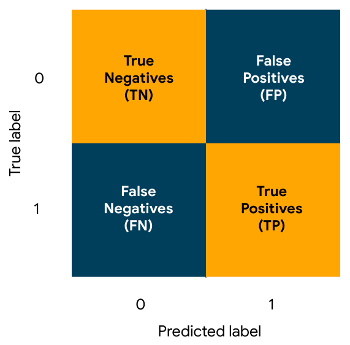

`Precision` represents the percentage of all our model's predicted positives that are true positives. This might not be the best metric for us to use, because it disincentivizes predicting someone will churn unless there is a high degree of certainty that they will. This could translate to `a high rate of false negatives`.

On the other hand, `recall` represents the percentage of all actual positives that the model identifies as such. This also might not be the best metric to use, because it rewards predicting someone will churn even if the likelihood of their doing so is very small. This could translate to `a high rate of false positives`.

So which is `worse`, `false positives` or `false negatives`? Well, we'd first have to define what _worse_ means. This is dependent on the details of the project that you're working on. For the sake of this exercise, let us suppose that we're defining it as the error that would cost the bank more money.

We can quickly get an idea of how much money each customer who churns costs the bank by calculating the average balance of all customers who churned.

In [ ]:
# Calculate average balance of customers who churned
avg_churned_bal = df_original[df_original['Exited']==1]['Balance'].mean()
avg_churned_bal

This shows that the customers who churned each took with them €91,108.54, on average. That's a lot of money! This represents the average cost of the model predicting a false negative.

What's the cost of predicting a false positive? Well, it's the cost of whatever the incentive might be to convince someone to stay with the bank when they were going to stay regardless of whether or not they were incentived. We don't have a number for this, and even if it's probably less than €91,108.54, it still could be thousands of Euros per customer in lost revenue, depending on the details of the incentive.

Since correctly identifying customers who will churn is potentially very valuable, we *could* select `recall` as our `most important metric`. This might be a perfectly valid approach, depending on the specifics of the campaign. But this could also be problematic. After all, if we select a model based solely on recall, we could select a very biased model that predicts everyone to churn, but then 8,000 people would be given incentives needlessly.  

Since we don't know the exact cost of predicting a false negative, we'll make an assumption for this exercise. We'll assume that a metric that balances precision and recall is best. The metric that helps us achieve this balance is _F1 score_, which is defined as the harmonic mean of precision and recall.

$${F_{1}} = 2 \cdot \frac{precision \cdot  recall}{precision + recall}$$  
</br>
Again, there are many metrics to choose from. The important thing is that you make an informed decision that is based on your use case.

Now that we've decided on an evaluation metric, let's prepare the data for modeling.

## Feature engineering

### Feature selection

In this step, we'll prepare the data for modeling. These are the same steps as what we did for the Naive Bayes model. For more thorough explanation of this process, refer to the [Feature Engineering notebook from Module 3](https://www.coursera.org/learn/the-nuts-and-bolts-of-machine-learning/ungradedLab/5w1w8/annotated-follow-along-resource-feature-engineering-with-python). Note that for time considerations, we won't create any new features.

We begin by dropping the columns that we wouldn't expect to offer any predictive signal to the model. These columns include `RowNumber`, `CustomerID`, and `Surname`. We'll drop these columns so they don't introduce noise to our model.  

We'll also drop the `Gender` column, because we don't want our model to make predictions based on gender.

In [ ]:
# Create a new df that drop RowNumber, CustomerId, Gender,
churn_df = df_original.drop(['RowNumber','CustomerId','Surname','Gender'],axis=1)

In [ ]:
churn_df.head()

### Feature transformation

Next, we'll dummy encode the `Geography` variable, which is categorical. There are three possible categories captured here: France, Spain, and Germany. When we call `pd.get_dummies()` on this feature, it will replace the `Geography` column with three new Boolean columns--one for each possible category contained in the column being dummied.

When we specify `drop_first='True'` in the function call, it means that instead of replacing `Geography` with three new columns, it will instead replace it with two columns. We can do this because no information is lost from this, but the dataset is shorter and simpler.  

In this case, we end up with two new columns called `Geography_Germany` and `Geography_Spain`. We don't need a `Geography_France` column. Why not? Because if a customer's values in `Geography_Germany` and `Geography_Spain` are both 0, we'll know they're from France!

In [ ]:
# Dummy encode categorical variables
churn_df = pd.get_dummies(churn_df, drop_first=True,)

In [ ]:
churn_df.head()

## Split the data

It's time to split the data into features and target variable, and into training data and test data. We do this using the `train_test_split()` function. We'll put 25% of the data into our test set, and use the remaining 75% to train the model.

Don't forget to include the `stratify=y` parameter, as this is what ensures that the 80/20 class ratio of the target variable is maintained in both the training and test datasets after splitting.

Lastly, we set a random seed so we and others can reproduce our work.

In [ ]:
# Define the y (target) variable
y = churn_df['Exited']

# Define the X (predictor) variable
X = churn_df.copy()
X = X.drop('Exited', axis=1)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)


## Baseline model

We'll first train a baseline model, just to get a sense of how predictive the data is and to give us scores that we can reference later. This will also show the process of instantiating and fitting the model, and then using it to make predictions. We'll predict on the test data.<br>

In [ ]:
# Instantiate the model
decision_tree = DecisionTreeClassifier(random_state=0)

# Fit the model to training data
decision_tree.fit(X_train,y_train)

# Make predictions on test data
dt_pred = decision_tree.predict(X_test)

In [ ]:
# Generate performance metrics
print("Accuracy: ", "%.3f" % accuracy_score(y_test,dt_pred))
print("Precision: ", "%.3f" % precision_score(y_test,dt_pred))
print("Recall: ", "%.3f" % recall_score(y_test,dt_pred))
print("F1 score: ", "%.3f" % f1_score(y_test,dt_pred))

A comparison of F1 scores reveals that the decision tree is an improvement to the Naive Bayes model we built earlier. For reference, here are the scores of both models:

| Model | F1 | Recall | Precision | Accuracy |
| :- | :-: | :-: | :-: | :-: |
| Decision Tree | 0.494 | 0.503 | 0.486 | 0.790 |
| Naive Bayes | 0.456 | 0.369 | 0.597 | 0.821 |

### Analysis of baseline model

#### Confusion matrix

Let's inspect the confusion matrix of our decision tree's predictions. First, we'll write a short helper function to help us display the matrix.

In [ ]:
def conf_matrix_plot(model, x_data, y_data):
    '''
    Accepts as argument model object, X data (test or validate), and y data (test or validate).
    Returns a plot of confusion matrix for predictions on y data.
    '''

    model_pred = model.predict(x_data)
    cm = confusion_matrix(y_data, model_pred, labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=model.classes_)

    disp.plot(values_format='')  # `values_format=''` suppresses scientific notation
    plt.show()

In [ ]:
# Generate confusion matrix
conf_matrix_plot(decision_tree, X_test, y_test)

Notice from this confusion matrix that the model correctly predicts many `true negatives`. Of course, this is to be expected, given that the dataset is imbalanced in favor of negatives. When the model makes an error, it appears slightly more likely to predict a `false positive` than a `false negative`, but it's generally balanced. This is reflected in the precision and recall scores both being very close to each other.

#### Plotting the tree

Next, let's examine the splits of the tree. We'll do this by using the `plot_tree()` function that we imported. We pass to it our fit model as well as some additional parameters. Note that if we did not set `max_depth=2`, the function would return a plot of the entire tree, all the way down to the leaf nodes. This is intractable and unnecessary. We're most interested in the splits nearest the root, because these tell us the most predictive features.

`class_names` displays what the majority class of each node is, and `filled` colors the nodes according to their majority class.

Note that this plot represents how the tree grew from the _training data_. To make its predictions on the test data, the tree would simply pass each customer in the test data through its splits, from the root node all the way down to a leaf node.

In [ ]:
# Plot the tree
plt.figure(figsize=(15,12))
plot_tree(decision_tree, max_depth=2, fontsize=14, feature_names=X.columns,
          class_names={0:'stayed', 1:'churned'}, filled=True);
plt.show()

How do we read this plot? The first line of information in each node is the feature and split point that the model identified as being most predictive. In other words, this is the question that is being asked at that split. For our root node, the question was: _Is the customer less than or equal to 42.5 years old?_

At each node, if the answer to the question it asks is "yes," the sample would move to the child node on the left. If the answer is "no," the sample would go to the child node on the right.

`gini` refers to the node's _Gini impurity_. This is a way of measuring how "pure" a node is. The value can range from 0 to 0.5. A Gini score of 0 means there is no impurity&mdash;the node is a leaf, and all of its samples are of a single class. A score of 0.5 means the classes are all equally represented in that node.

`samples` is simply how many samples are in that node, and `value` indicates how many of each class are in the node. Returning to the root node, we have `value = [5972, 1528]`. Notice that these numbers sum to 7,500, which is the number of samples in the node. This tells us that 5,972 customers in this node stayed (y=0) and 1,528 customers churned (y=1).

Lastly, we have `class`. This tells us the majority class of the samples in each node.

This plot tells us that, if we could only do a single split on a single variable, the one that would most help us predict whether a customer will churn is their age.

If we look at the nodes at depth one, we notice that the number of products and whether or not the customer is an active member also are both strong predictors (relative to the features we have) of whether or not they will churn.

This is a good indication that it might be worthwhile to return to your EDA and examine these features more closely.

Finally, it's worth noting that there is no single question that can be asked&mdash;for any feature&mdash;that would cause a majority of samples in one of the child nodes to be of class "churned." The tree must get to depth two (i.e., two questions must be asked) before this happens.

If you have successfully completed the material above, congratulations! You now understand how to use Python to construct and interpret a decision tree model. Going forward, you can start using Python to build decision trees with your own data.

# Tune and validate decision trees with Python

**Important:** This part of the notebook corresponds with the "Tune and validate decision trees with Python" video, but it builds on the code from a previous video. If you have not already done so, run all of the preceding cells. You can do this easily by going to "Cell" in the menu at the top of the notebook and clicking "Run All Above" in the dropdown menu.

Throughout the following exercises, you will learn to use Python to tune and cross-validate a decision tree model with scikit-learn. Before starting on this programming exercise, we strongly recommend watching the video lecture for the associated topics.

All the information you need for solving this assignment is in this notebook, and all the code you will be implementing will take place within this notebook.

Topics of focus include:

* Using `GridSearchCV` to tune the following hyperparameters with cross-validation:
  - `max_depth`
  - `min_samples_leaf`

As we move forward, you can find instructions on how to install required libraries as they arise in this notebook.

## A note on modeling workflow and model selection

The tuned decision tree model in this notebook will be referenced in the subsequent notebooks for random forest and XGBoost, which model the same data. Because of this, we will build all of our models across all of these notebooks, and model selection will take place in the final notebook. The champion model will be the one that performs best on the validation data. Only this final model will be evaluated using the test data.

This approach has a limitation. We are using the same data to tune the hyperparameters as we are using to perform model selection. This risks potentially overfitting the model to the validation data.

Ideally, with enough time and data, we'd tune the models' hyperparameters, then score all the models on _separate_ validation data and perform model selection based on these scores. Finally, the champion model would be scored on the test holdout data to get an estimate of how the model can be expected to perform on new, unseen data.

## Import statements

This is a continuation of the notebook for the baseline decision tree model. Refer to the import statements above.

The only additional import is `GridSearchCV` from scikit-learn's `model_selection` module. This is what we'll use to perform the grid search to tune the model's hyperparameters.

In [ ]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

## Cross-validated hyperparameter tuning

Cross-validating a model using GridSearchCV can be done in a number of different ways. If you find notebooks online that other people have written, you'll likely soon discover this for yourself. But all variations must fulfill the same general requirements. (Refer to the [GridSearchCV documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV) for further reading.)

The format presented below is step-wise, making it easier to follow.
* Instantiate the classifier (and set the `random_state`)

In [ ]:
# Instantiate the classifier
tuned_decision_tree = DecisionTreeClassifier(random_state = 42)

* Create a dictionary of hyperparameters to search over:

  - key = name of hyperparameter (string)
  - value = values to search over (list)

In [ ]:
# Assign a dictionary of hyperparameters to search over
tree_para = {'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50],
             'min_samples_leaf': [2, 5, 10, 20, 50]}

* Create a set of scoring metrics to capture. These metrics can be selected from scikit-learn's [built-in options](https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter) or custom-defined. For this exercise, we'll capture accuracy, precision, recall, and F1 score so we can examine all of them. The metrics are entered as strings.

In [ ]:
# Assign a set of scoring metrics to capture
scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1'
}

* Instantiate the `GridSearchCV` object. Pass as arguments:
  - The classifier (`tuned_decision_tree`)
  - The dictionary of hyperparameters to search over (`tree_para`)
  - The set of scoring metrics (`scoring`)
  - The number of cross-validation folds you want (`cv=5`)
  - The scoring metric that you want GridSearch to use when it selects the "best" model (i.e., the model that performs best on average over all validation folds) (`refit='f1'`*)

    \* The reason it's called `refit` is because once the algorithm finds the combination of hyperparameters that results in the best average score across all validation folds, it will then refit this model to _all_ of the training data. Remember, up until now, with a 5-fold cross-validation, the model has only ever been fit on 80% (4/5) of the training data, because the remaining 20% was held out as a validation fold.
    

* Fit the data (`X_train`, `y_train`) to the `GridSearchCV` object (`clf`)

Depending on the number of different hyperparameters you choose, the number of combinations you search over, the size of your data, and your available computing resources, this could take a long time.

In [ ]:
%%time
# Instantiate the GridSearch
clf = GridSearchCV(tuned_decision_tree,
                   tree_para,
                   scoring = scoring,
                   cv=5,
                   refit="f1")

# Fit the model
clf.fit(X_train, y_train)

Now that the model is fit and cross-validated, we can use the `best_estimator_` attribute to inspect the hyperparameter values that yielded the highest F1 score during cross-validation.

In [ ]:
print("Best Avg. Validation Score: ", "%.4f" % clf.best_score_)

Although the F1 score of 0.561 is significantly better than the baseline model's F1 score of 0.494, it's not a fair comparison, because the baseline model was scored on the test data and the tuned model was scored against validation folds that came from the training data.

Recall that when we ran our grid search, we specified that we also wanted to capture precision, recall, and accuracy. The reason for doing this is that it's difficult to interpret an F1 score. These other metrics are much more directly interpretable, so they're worth knowing.

The following cell defines a helper function that extracts these scores from the fit `GridSearchCV` object and returns a pandas dataframe with all four scores from the model with the best average F1 score during validation. This function will help us later when we want to add the results of other models to the table.

In [ ]:
def make_results(model_name, model_object):
    '''
    Accepts as arguments a model name (your choice - string) and
    a fit GridSearchCV model object.

    Returns a pandas df with the F1, recall, precision, and accuracy scores
    for the model with the best mean F1 score across all validation folds.
    '''

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(mean f1 score)
    best_estimator_results = cv_results.iloc[cv_results['mean_test_f1'].idxmax(), :]

    # Extract accuracy, precision, recall, and f1 score from that row
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy

    # Create table of results
    table = pd.DataFrame()
    # Create table of results
    table = pd.DataFrame({'Model': [model_name],
                          'F1': [f1],
                          'Recall': [recall],
                          'Precision': [precision],
                          'Accuracy': [accuracy]
                         }
                        )

    return table

In [ ]:
# Call the function on our model
result_table = make_results("Tuned Decision Tree", clf)

We can save these results and open them in another notebook if we want to add to them. We'll save as a .csv file using `to_csv()`.

In [ ]:
# Save table as csv
result_table.to_csv("Results.csv")

In [ ]:
# View the results
result_table

# Activity : Build a decision tree

## Introduction

In this activity, you’ll build a decision tree model that makes predictions for a target based on multiple features. Because decision trees are used across a wide array of industries, becoming proficient in the process of building one will help you expand your skill set in a widely-applicable way.   

For this activity, you work as a consultant for an airline. The airline is interested in predicting whether a future customer would be satisfied with their services given previous customer feedback about their flight experience. The airline would like you to construct and evaluate a model that can accomplish this goal. Specifically, they are interested in knowing which features are most important to customer satisfaction.

The data for this activity includes survey responses from 129,880 customers. It includes data points such as class, flight distance, and in-flight entertainment, among others. In a previous activity, you utilized a binomial logistic regression model to help the airline better understand this data. In this activity, your goal will be to utilize a decision tree model to predict whether or not a customer will be satisfied with their flight experience.

Because this activity uses a dataset from the industry, you will need to conduct basic EDA, data cleaning, and other manipulations to prepare the data for modeling.

In this activity, you’ll practice the following skills:

* Importing packages and loading data
* Exploring the data and completing the cleaning process
* Building a decision tree model
* Tuning hyperparameters using `GridSearchCV`
* Evaluating a decision tree model using a confusion matrix and various other plots

## Step 1: Imports

Import relevant Python packages. Use `DecisionTreeClassifier`,` plot_tree`, and various imports from `sklearn.metrics` to build, visualize, and evaluate the model.

### Import packages

In [ ]:
# Standard operational package imports
import numpy as np
import pandas as pd

# Important imports for modeling and evaluation
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import sklearn.metrics as metrics

# Visualization package imports
import matplotlib.pyplot as plt
import seaborn as sns

### Load the dataset
`Pandas` is used to load the **Invistico_Airline.csv** dataset. The resulting pandas DataFrame is saved in a variable named `df_original`. As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [ ]:
# RUN THIS CELL TO IMPORT YOUR DATA.

df_original = pd.read_csv("Invistico_Airline.csv")

### Output the first 10 rows of data

In [ ]:
df_original.head(n = 10)

## Step 2: Data exploration, data cleaning, and model preparation

### Prepare the data

After loading the dataset, prepare the data to be suitable for decision tree classifiers. This includes:

*   Exploring the data
*   Checking for missing values
*   Encoding the data
*   Renaming a column
*   Creating the training and testing data

### Explore the data

Check the data type of each column. Note that decision trees expect numeric data.

In [ ]:
df_original.dtypes

### Output unique values

The `Class` column is ordinal (meaning there is an inherent order that is significant). For example, airlines typically charge more for 'Business' than 'Eco Plus' and 'Eco'. Output the unique values in the `Class` column.

In [ ]:
df_original["Class"].unique()

### Check the counts of the predicted labels

In order to predict customer satisfaction, verify if the dataset is imbalanced. To do this, check the counts of each of the predicted labels.

In [ ]:
df_original['satisfaction'].value_counts(dropna = False)

**Question:** How many satisfied and dissatisfied customers were there?

There are 71087 satisfied customers and 58793 dissatisfied customers.

**Question:** What percentage of customers were satisfied?

54.7 percent (71087/129880) of customers were satisfied. This value can be compared to a decision tree's model accuracy.

### Check for missin values

The sklearn decision tree implementation does not support missing values. Check for missing values in the rows of the data.

In [ ]:
df_original.isnull().sum()

**Question:** Why is it important to check how many rows and columns there are in the dataset?

This is important to check because if there are only a small number of missing values in the dataset, they can more safely be removed.

### Check the number of rows and columns in the dataset

In [ ]:
df_original.shape

### Drop the rows with missing values

Drop the rows with missing values and save the resulting pandas DataFrame in a variable named `df_subset`.

In [ ]:
df_subset = df_original.dropna(axis=0).reset_index(drop = True)

### Check for missing values

Check that `df_subset` does not contain any missing values.

In [ ]:
df_subset.isna().sum()

### Check the number of rows and columns in the dataset again

Check how many rows and columns are remaining in the dataset. You should now have 393 fewer rows of data.

In [ ]:
df_subset.shape

### Encode the data

Four columns (`satisfaction`, `Customer Type`, `Type of Travel`, `Class`) are the pandas dtype object. Decision trees need numeric columns. Start by converting the ordinal `Class` column into numeric.

In [ ]:
df_subset['Class'] = df_subset['Class'].map({"Business": 3, "Eco Plus": 2, "Eco": 1})

### Represent the data in the target variable numerically

To represent the data in the target variable numerically, assign `"satisfied"` to the label `1` and `"dissatisfied"` to the label `0` in the `satisfaction` column.

In [ ]:
df_subset['satisfaction'] = df_subset['satisfaction'].map({"satisfied": 1, "dissatisfied": 0})

### Convert categorical columns into numeric

There are other columns in the dataset that are still categorical. Be sure to convert categorical columns in the dataset into numeric.

In [ ]:
df_subset = pd.get_dummies(df_subset, drop_first = True)

### Check column data types

Now that you have converted categorical columns into numeric, check your column data types.

In [ ]:
df_subset.dtypes

### Create the training and testing data

Put 75% of the data into a training set and the remaining 25% into a testing set.

In [ ]:
y = df_subset["satisfaction"]

X = df_subset.copy()
X = X.drop("satisfaction", axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

## Step 3: Model building

### Fit a decision tree classifier model to the data

Make a decision tree instance called `decision_tree` and pass in `0` to the `random_state` parameter. This is only so that if other data professionals run this code, they get the same results. Fit the model on the training set, use the `predict()` function on the testing set, and assign those predictions to the variable `dt_pred`.

In [ ]:

decision_tree = DecisionTreeClassifier(random_state=0)

decision_tree.fit(X_train, y_train)

dt_pred = decision_tree.predict(X_test)

**Question:** What are some advantages of using decision trees versus other models you have learned about?

Decision trees require no assumptions regarding the distribution of underlying data and don't require scaling of features. This lab uses decision trees because there is no need for additional data processing, unlike some other models.

## Step 4: Results and evaluation

Print out the decision tree model's accuracy, precision, recall, and F1 score.

In [ ]:
print("Decision Tree")
print("Accuracy:", "%.6f" % metrics.accuracy_score(y_test, dt_pred))
print("Precision:", "%.6f" % metrics.precision_score(y_test, dt_pred))
print("Recall:", "%.6f" % metrics.recall_score(y_test, dt_pred))
print("F1 Score:", "%.6f" % metrics.f1_score(y_test, dt_pred))

**Question:** Are there any additional steps you could take to improve the performance or function of your decision tree?

Decision trees can be particularly susceptible to overfitting. Combining hyperparameter tuning and grid search can help ensure this doesn't happen. For instance, setting an appropriate value for max depth could potentially help reduce a decision tree's overfitting problem by limiting how deep a tree can grow.

### Produce a confusion matrix

Data professionals often like to know the types of errors made by an algorithm. To obtain this information, produce a confusion matrix.

In [ ]:
cm = metrics.confusion_matrix(y_test, dt_pred, labels = decision_tree.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm,display_labels = decision_tree.classes_)
disp.plot()

**Question:** What patterns can you identify between true positives and true negatives, as well as false positives and false negatives?

In the confusion matrix, there are a high proportion of true positives and true negatives (where the matrix accurately predicted that the customer would be satisfied or dissatified, respectively).

The matrix also had a relatively low number of false positives and false negatives (where the matrix innacurately predicted that the customer would be satisfied or dissatified, respectively.)

### Plot the decision tree

Examine the decision tree. Use `plot_tree` function to produce a visual representation of the tree to pinpoint where the splits in the data are occurring.

In [ ]:
plt.figure(figsize=(20,12))
plot_tree(decision_tree, max_depth=2, fontsize=14, feature_names=X.columns);

### BONUS STEP: Calculate feature importance

The `DecisionTreeClassifier` class comes with a [`feature_importances_`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier.feature_importances_) attribute that provides access to the features' relative importance in the model. The feature importances are computed when the `fit()` method is called on the `DecisionTreeClassifier` instance. In other words, it's information that is generated during model training. Here's how it works.

For each feature used in the tree, the algorithm finds all of the decision nodes that use that particular feature as the split criterion. Then for each of those decision nodes it computes the decrease in Gini impurity (or entropy, or log loss, or whatever metric you select when you fit the model&mdash;default is Gini impurity) that results from that split (so, the decrease from parent to children). Then the algorithm sums up the decreases across all the decisions made using that feature and expresses it as a percentage of the total decrease that resulted from _all_ features.

Here is a simple example of how you can calculate feature importance from a tree diagram. This tree splits 10 samples using two features, X<sub>1</sub> and X<sub>2</sub>:

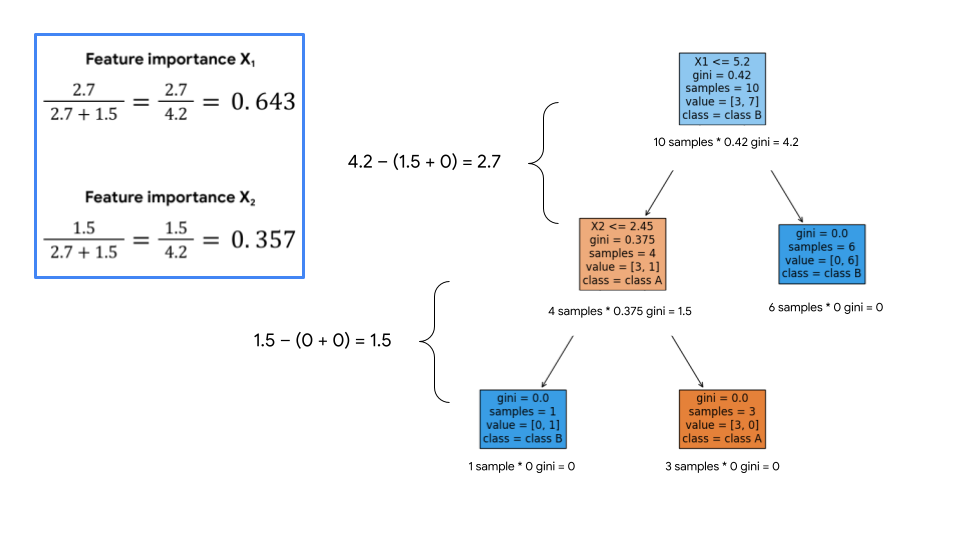

Notice that the reduction in Gini impurity is weighted based on how many samples are in each node. Ultimately, the reduction that results from each feature is normalized (i.e., expressed as a percentage), and this percentage represents the importance of a given feature.

This can be interpreted as: X<sub>1</sub> is responsible for 64.3% of the overall reduction of Gini impurity in the model, and X<sub>2</sub> is responsible for 35.7% of the overall reduction of Gini impurity in the model.

Using the `feature_importances_` attribute to fetch the relative importances of each feature, you can then plot the results.

In [ ]:
importances = decision_tree.feature_importances_

forest_importances = pd.Series(importances, index=X.columns).sort_values(ascending=False)

fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax);

The feature importance graph seems to confirm that `'Inflight entertainment'`, `'Seat comfort'`, and `'Ease of Online booking'` are the most important features for this model.

### Hyperparameter tuning

Knowing how and when to adjust or tune a model can help a data professional significantly increase performance. In this section, you will find the best values for the hyperparameters `max_depth` and `min_samples_leaf` using grid search and cross validation. Below are some values for the hyperparameters `max_depth` and `min_samples_leaf`.   

In [ ]:
tree_para = {'max_depth':[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,30,40,50],
             'min_samples_leaf': [2,3,4,5,6,7,8,9, 10, 15, 20, 50]}

scoring = {'accuracy': 'accuracy','precision': 'precision','recall': 'recall','f1': 'f1'}

### Check combinations of values

Check every combination of values to examine which pair has the best evaluation metrics. Make a decision tree instance called `tuned_decision_tree` with `random_state=0`, make a `GridSearchCV` instance called `clf`, make sure to refit the estimator using `"f1"`, and fit the model on the training set.

**Note:** This cell may take up to 15 minutes to run.

In [164]:
tuned_decision_tree = DecisionTreeClassifier(random_state=0)

clf = GridSearchCV(tuned_decision_tree,
                   tree_para,
                   scoring = scoring,
                   cv=5,
                   refit="f1")

clf.fit(X_train, y_train)

KeyboardInterrupt: 

**Question:** How can you determine the best combination of values for the hyperparameters?

Use the best estimator tool to help uncover the best pair combination.

### Compute the best combination of values for the hyperparameters

In [ ]:
clf.best_estimator_

**Question:** What is the best combination of values for the hyperparameters?

After running the DecisionTreeClassifier, the maximum depth is 18 and the minimum number of samples is two, meaning this is the best combination of values.

### Determine the best average validation score

In [ ]:
print("Best Avg. Validation Score: ", "%.4f" % clf.best_score_)

**Question:** What is the best average validation score?

The best validation score is 0.9454.

### Determine the "best" decision tree model's accuracy, precision, recall, and F1 score

Print out the decision tree model's accuracy, precision, recall, and F1 score. This task can be done in a number of ways.

In [ ]:
results = pd.DataFrame(columns=['Model', 'F1', 'Recall', 'Precision', 'Accuracy'])

def make_results(model_name, model_object):
    """
    Accepts as arguments a model name (your choice - string) and
    a fit GridSearchCV model object.

    Returns a pandas df with the F1, recall, precision, and accuracy scores
    for the model with the best mean F1 score across all validation folds.
    """

    # Get all the results from the CV and put them in a df.
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(mean f1 score).
    best_estimator_results = cv_results.iloc[cv_results['mean_test_f1'].idxmax(), :]

    # Extract accuracy, precision, recall, and f1 score from that row.
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy


    # Create table of results
    table = pd.DataFrame({'Model': [model_name],
                          'F1': [f1],
                          'Recall': [recall],
                          'Precision': [precision],
                          'Accuracy': [accuracy]
                         }
                        )

    return table

result_table = make_results("Tuned Decision Tree", clf)

result_table

**Question:** Was the additional performance improvement from hyperparameter tuning worth the computational cost? Why or why not?

The F1 score for the decision tree that was not hyperparameter tuned is 0.940940 and the F1 score for the hyperparameter-tuned decision tree is 0.945422. While ensuring that overfitting doesn't occur is necessary for some models, it didn't make a meaningful difference in improving this model.

### Plot the "best" decision tree

Use the `plot_tree` function to produce a representation of the tree to pinpoint where the splits in the data are occurring. This will allow you to review the "best" decision tree.

In [ ]:
plt.figure(figsize=(20,12))
plot_tree(clf.best_estimator_, max_depth=2, fontsize=14, feature_names=X.columns);

The plot makes it seem like `'Inflight entertainment'`, `'Seat comfort'`, and `'Ease of Online booking'` are among the most important features. The code below outputs a "most important" features graph from the model.

### BONUS STEP: Build another feature importance graph

You can build another feature importance graph to validate which features are most important.

In [ ]:
importances = clf.best_estimator_.feature_importances_

forest_importances = pd.Series(importances, index=X.columns).sort_values(ascending=False)

fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax);

The feature importance graph seems to confirm that `'Inflight entertainment'`, `'Seat comfort'`, and `'Ease of Online booking'` are the "most important" features for this model.

**Question:** What do you think is the most important metric in this business case?

Any of the metrics in this business case could be considered important, depending on what the stakeholder or domain expert cares about. The following are reasons why each metric is important:

- Accuracy tends to be the metric that the stakeholders can best understand.

- Precision measures what proportion of predicted positives is truly positive. For example, if you wanted to not falsely claiming a customer is satisfied, precision would be a good metric. Assuming a customer is happy when they are really not might lead to customer churn.

- Recall measures the percentage of actual positives a model correctly identified (true positive). For this dataset, the airline might want to limit false negatives (actually satisfied people who are predicted to be unsatisfied). Assuming a customer is unhappy when the customer is happy can lead to the airline wasting resources trying to improve the customer experience of an already happy customer.

- F1 balances precision and recall. It is the harmonic mean of precision and recall, or their product divided by their sum.

## Considerations

**What are some key takeaways that you learned from this lab?**
*   Machine learning workflows may be used to clean and encode data for machine learning.
*   While hyperparameter tuning can lead to an increase in performance, it doesn't always.
*   The visualization of the decision tree as well as the feature graph can be used to determine which features are most important for a decision tree.


**What findings would you share with others?**
*   Decision trees accurately predicted satisfaction over 94 percent of the time.  
*   The confusion matrix is useful as it shows a similar number of true positives and true negatives.
*   The visualization of the decision tree and the feature importance graph both suggest that `'Inflight entertainment'`, `'Seat comfort'`, and `'Ease of Online booking'` are the most important features in the model.

**What would you recommend to stakeholders?**
*  Customer satisfaction is highly tied to `'Inflight entertainment'`, `'Seat comfort'`, and `'Ease of Online booking'`. Improving these experiences should lead to better customer satisfaction.
*  The success of the model suggests that the airline should invest more effort into model building and model understanding since this model semed to be very good at predicting customer satisfaction.

# Random forest tuning & cross-validation

Throughout the following exercises, you will learn to use Python to construct and validate a random forest ensemble model with scikit-learn. Before starting on this programming exercise, we strongly recommend watching the video lecture and completing the IVQ for the associated topics.

**Note**: This notebook is divided into two parts, each with its own instructional video. Begin here, or skip ahead to [Part 2](#part_2) if you have already completed the first part.




All the information you need for solving this assignment is in this notebook, and all the code you will be implementing will take place within this notebook.

Topics of focus include:


*   Relevant import statements
*   Encoding of categorical features as dummies
*   Stratification during data splitting
*   Fitting a model
*   Using `GridSearchCV` to cross-validate the model and tune the following hyperparameters:  
    - `max_depth`  
    - `max_features`  
    - `min_samples_split`
    - `n_estimators`  
    - `min_samples_leaf`  
*   Model evaluation using precision, recall, and f1 score

## Review

This notebook is a continuation of the bank churn project. Below is a recap of the considerations and decisions that we've already made. For detailed discussion of these topics, refer back to the [fully annotated notebook for the decision tree model](https://www.coursera.org/learn/the-nuts-and-bolts-of-machine-learning/ungradedLab/HVyMU/annotated-follow-along-guide-build-a-decision-tree).

>  **Modeling objective:** To predict whether a customer will churn&mdash;a binary classification task.


>  **Target variable:** `Exited` column&mdash;0 or 1.  

>  **Class balance:** The data is imbalanced 80/20 (not churned/churned), but we will not perform class balancing.

>  **Primary evaluation metric:** F1 score.

>  **Modeling workflow and model selection:** The champion model will be the model with the best validation F1 score. Only the champion model will be used to predict on the test data. See the annotated decision tree notebook for details and limitations of this approach.

## A note on cross-validation/validation

This notebook is for teaching purposes. As such, it includes two approaches to validation: cross-validating the training data and validating using a separate validation dataset. In practice, you generally will only use one or the other for a given project.

Cross-validation is more rigorous, because it maximizes the usage of the training data, but if you have a very large dataset or limited computing resources, it may be better to validate with a separate validation dataset.

## Import statements

Before we begin with the exercises and analyzing the data, we need to import all libraries and extensions required for this programming exercise. Throughout the course, we will be using numpy and pandas for operations, and matplotlib for plotting.

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

# This lets us see all of the columns, preventing Juptyer from redacting them.
pd.set_option('display.max_columns', None)

from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay

from sklearn.ensemble import RandomForestClassifier

# This module lets us save our models once we fit them.
import pickle

## Read in the data

In [ ]:
# Read in data
file = 'Churn_Modelling.csv'
df_original = pd.read_csv(file)
df_original.head()

## Feature engineering

### Feature selection

In this step, we'll prepare the data for modeling.  Notice from above that there are a number of columns that we wouldn't expect to offer any predictive signal to the model. These columns include `RowNumber`, `CustomerID`, and `Surname`. We'll drop these columns so they don't introduce noise to our model.  

We'll also drop the `Gender` column, because we don't want our model to make predictions based on gender.

In [ ]:
# Drop useless and sensitive (Gender) cols
churn_df = df_original.drop(['RowNumber', 'CustomerId', 'Surname', 'Gender'], axis=1)
churn_df.head()

### Feature transformation

Next, we'll dummy encode the `Geography` variable, which is categorical. We do this with the `pd.get_dummies()` function and setting `drop_first='True'`, which replaces the `Geography` column with two new Boolean columns called `Geography_Germany` and `Geography_Spain`.

In [ ]:
# Dummy encode categoricals
churn_df2 = pd.get_dummies(churn_df, drop_first='True')
churn_df2.head()

## Split the data

We'll split the data into features and target variable, and into training data and test data using the `train_test_split()` function.

Don't forget to include the `stratify=y` parameter, as this is what ensures that the 80/20 class ratio of the target variable is maintained in both the training and test datasets after splitting.

Lastly, we set a random seed so we and others can reproduce our work.

In [ ]:
# Define the y (target) variable
y = churn_df2["Exited"]

# Define the X (predictor) variables
X = churn_df2.copy()
X = X.drop("Exited", axis = 1)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

## Modeling

### Cross-validated hyperparameter tuning

The cross-validation process is the same as it was for the decision tree model. The only difference is that we're tuning more hyperparameters now. The steps are included below as a review.

For details on cross-validating with `GridSearchCV`, refer back to the decision tree notebook, or to the [GridSearchCV documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV) in scikit-learn.

1. Instantiate the classifier (and set the `random_state`).

2. Create a dictionary of hyperparameters to search over.

3. Create a set of scoring metrics to capture.

4. Instantiate the `GridSearchCV` object. Pass as arguments:
  - The classifier (`rf`)
  - The dictionary of hyperparameters to search over (`cv_params`)
  - The set of scoring metrics (`scoring`)
  - The number of cross-validation folds you want (`cv=5`)
  - The scoring metric that you want GridSearch to use when it selects the "best" model (i.e., the model that performs best on average over all validation folds) (`refit='f1'`)

5. Fit the data (`X_train`, `y_train`) to the `GridSearchCV` object (`rf_cv`).

Note that we use the `%%time` magic at the top of the cell. This outputs the final runtime of the cell. (Magic commands, often just called "magics," are commands that are built into IPython to simplify common tasks. They begin with `%` or `%%`.)



In [ ]:
%%time

rf = RandomForestClassifier(random_state=0)

cv_params = {'max_depth': [2,3,4,5, None],
             'min_samples_leaf': [1,2,3],
             'min_samples_split': [2,3,4],
             'max_features': [2,3,4],
             'n_estimators': [75, 100, 125, 150]
             }

scoring = {'accuracy': 'accuracy', 'precision': 'precision','recall':'recall','f1':'f1'}

rf_cv = GridSearchCV(rf, cv_params, scoring=scoring, cv=5, refit='f1')

#rf_cv.fit(X_train, y_train)

# Random forest validation on separate dataset

This is a continuation of the bank churn cross-validated random forest modeling notebook. This section of the notebook will demonstrate how to construct and validate a random forest ensemble model in Python with scikit-learn.

Topics of focus include:

  * Using `pickle` to save a fit model
  * Using a separate dataset to tune hyperparameters and validate your model
    * Splitting the training data to create a validation dataset
    * Creating a list of split indices to use with `PredefinedSplit` so `GridSearchCV` performs validation on this defined validation set

## Pickle  

When models take a long time to fit, you don’t want to have to fit them more than once. If your kernel disconnects or you shut down the notebook and lose the cell’s output, you’ll have to refit the model, which can be frustrating and time-consuming.

`pickle` is a tool that saves the fit model object to a specified location, then quickly reads it back in. It also allows you to use models that were fit somewhere else, without having to train them yourself.

In [ ]:
# Define a path to the folder where you want to save the model
path = '/content/pickle'

This step will ***W***rite (i.e., save) the model, in ***B***inary (hence, `wb`), to the folder designated by the above path. In this case, the name of the file we're writing is `rf_cv_model.pickle`.

In [ ]:
# Pickle the model
with open(path+'rf_cv_model.pickle', 'wb') as to_write:
    pickle.dump(rf_cv, to_write)

Once we save the model, we'll never have to re-fit it when we run this notebook. Ideally, we could open the notebook, select "Run all," and the cells would run successfully all the way to the end without any model retraining.

For this to happen, we'll need to return to the cell where we defined our grid search and comment out the line where we fit the model. Otherwise, when we re-run the notebook, it would refit the model.

Similarly, we'll also need to go back to where we saved the model as a pickle and comment out those lines.  

Next, we'll add a new cell that reads in the saved model from the folder we already specified. For this, we'll use `rb` (read binary) and be sure to assign the model to the same variable name as we used above, `rf_cv`.

In [ ]:
# Read in pickled model
with open(path + 'rf_cv_model.pickle', 'rb') as to_read:
    rf_cv = pickle.load(to_read)

Now everything above is ready to run quickly and without refitting. We can continue by using the model's `best_params_` attribute to check the hyperparameters that had the best average F1 score across all the cross-validation folds.

In [ ]:
rf_cv.fit(X_train, y_train)
rf_cv.best_params_

And to check the best average F1 score of this model on the validation folds, we can use the `best_score_` attribute. Remember, if we had instead set `refit=recall` when we instantiated our `GridSearchCV` object earlier, then calling `best_score_` would return the best recall score, and the best parameters might not be the same as what they are in the above cell, because the model would be optimizing for a different metric.

In [ ]:
rf_cv.best_score_

Our model had an F1 score of 0.5805&mdash;not terrible. Recall that when we ran our grid search, we specified that we also wanted to capture precision, recall, and accuracy.

The reason for doing this is that it's difficult to interpret an F1 score. These other metrics are much more directly interpretable, so they're worth knowing.

The following cell defines a helper function that extracts these scores from the fit `GridSearchCV` object and returns a pandas dataframe with all four scores from the model with the best average F1 score during validation.

In [ ]:
def make_results(model_name, model_object):
    '''
    Accepts as arguments a model name (your choice - string) and
    a fit GridSearchCV model object.

    Returns a pandas df with the F1, recall, precision, and accuracy scores
    for the model with the best mean F1 score across all validation folds.
    '''

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(mean f1 score)
    best_estimator_results = cv_results.iloc[cv_results['mean_test_f1'].idxmax(), :]

    # Extract accuracy, precision, recall, and f1 score from that row
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy

    # Create table of results
    table = pd.DataFrame({'Model': [model_name],
                          'F1': [f1],
                          'Recall': [recall],
                          'Precision': [precision],
                          'Accuracy': [accuracy]
                         }
                        )

    return table

In [ ]:
# Make a results table for the rf_cv model using above function
rf_cv_results = make_results('Random Forest CV', rf_cv)
rf_cv_results

We can concatenate these results to our master results table from when we built the single decision tree model.

In [ ]:
# Read in master results table
results = pd.read_csv('results1.csv', index_col=0)
results

In [ ]:
# Concatenate the random forest results to the master table
results = pd.concat([rf_cv_results, results])
results

The scores in the above table tell us that the random forest model performs better than the single decision tree model on every metric. Nice!

Now, let's build another random forest model, only this time we'll tune the hyperparameters using a separate validation dataset.




## Modeling

### Hyperparameters tuned with separate validation set  

Begin by splitting the training data to create a validation dataset. Remember, we won't touch the test data at all.  

We'll use `train_test_split` to divide `X_train` and `y_train` into 80% training data (`X_tr`, `y_tr`) and 20% validation data (`X_val`, `y_val`). Don't forget to stratify it and set the random state.

In [ ]:
# Create separate validation data
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.2,
                                            stratify=y_train, random_state=10)

When we tune hyperparameters with `GridSearchCV` using a separate validation dataset, we have to take a few extra steps. `GridSearchCV` wants to cross-validate the data. In fact, if the `cv` argument were left blank, it would split the data into five folds for cross-validation by default.

We don't want it to do this. Instead, we're going to tell it exactly which rows of `X_train` are for training, and which rows are for validation.  

To do this, we need to make a list of length `len(X_train)` where each element is either a 0 or -1. A 0 in index _i_ will indicate to `GridSearchCV` that index _i_ of `X_train` is to be held out for validation. A -1 at a given index will indicate that that index of `X_train` is to be used as training data.

We'll make this list using a list comprehension that looks at the index number of each row in `X_train`. If that index number is in `X_val`'s list of index numbers, then the list comprehension appends a 0. If it's not, then it appends a -1.

So if our training data is:  
[A, B, C, D],  
and our list is:   
[-1, 0, 0, -1],  
then `GridSearchCV` will use a training set of [A, D] and validation set of [B, C].

In [ ]:
# Create list of split indices
split_index = [0 if x in X_val.index else -1 for x in X_train.index]

Now that we have this list, we need to import a new function called `PredefinedSplit`. This function is what allows us to pass the list we just made to `GridSearchCV`. (You can read more about this function in the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.PredefinedSplit.html#sklearn.model_selection.PredefinedSplit).)

In [ ]:
from sklearn.model_selection import PredefinedSplit

Now we can build the model. Everything is the same as when we cross-validated, except this time we pass the `split_index` list to the `PredefinedSplit` function and assign it to a new variable called `custom_split`.

Then we'll use this variable for the `cv` argument when we instantiate `GridSearchCV`.

In [ ]:
rf = RandomForestClassifier(random_state=0)

cv_params = {'max_depth': [2,3,4,5, None],
             'min_samples_leaf': [1,2,3],
             'min_samples_split': [2,3,4],
             'max_features': [2,3,4],
             'n_estimators': [75, 100, 125, 150]
             }

scoring = {'accuracy', 'precision', 'recall', 'f1'}

custom_split = PredefinedSplit(split_index)

rf_val = GridSearchCV(rf, cv_params, scoring=scoring, cv=custom_split, refit='f1')

### fit the model
Now fit the model.

In [ ]:
rf_val.fit(X_train, y_train)

Notice that this took less time than when we cross-validated&mdash;about 1/5 of the time. This is because _during cross-validation_ the training data was divided into five folds. An ensemble of trees was grown with a particular combination of hyperparameters on four folds of data, and validated on the fifth fold that was held out. This whole process happened for each of five holdout folds. Then, another ensemble was trained with the next combination of hyperparameters, repeating the whole process. This continued until there were no more combinations of hyperparameters to run.  

cross_validation_diagram.svg

But now that we're _using a separate validation set,_ an ensemble is built for each combination of hyperparameters. Each ensemble is trained on the new training set and validated on the validation set. But this only happens _one time_ for each combination of hyperparameters, instead of _five times_ with cross-validation. That’s why the training time was only a fifth as long.

single_validation_diagram.svg

Let's pickle the model...

In [ ]:
# Pickle the model
with open(path+'rf_val_model.pickle', 'wb') as to_write:
    pickle.dump(rf_val, to_write)

... and comment out where we fit the model and wrote the pickle, then read back in the pickled model.

In [ ]:
# Open pickled model
with open(path+'rf_val_model.pickle', 'rb') as to_read:
    rf_val = pickle.load(to_read)

Now check the parameters of the best-performing model on the validation set:

In [ ]:
rf_val.best_params_

Notice that the best hyperparameters were slightly different than the cross-validated model.  

Now, we'll generate the model results using the `make_results` function, add them to the master table, and then sort them by F1 score in descending order.

In [ ]:
# Create model results table
rf_val_results = make_results('Random Forest Validated', rf_val)

# Concatentate model results table with master results table
results = pd.concat([rf_val_results, results])

# Sort master results by F1 score in descending order
results.sort_values(by=['F1'], ascending=False)

We can save the new master table to use later when we build more models.

In [ ]:
# Save the master results table
results.to_csv(path+'results2.csv', index=False);

## Model selection and final results

Now we have three models. If we've decided that we're done trying to optimize them, then we can now use our best model to predict on the test holdout data. We'll be using the cross-validated model without the depth limitation, but if we were instead to use the model that was validated against a separate validation dataset, we'd now go back and retrain the model on the full training set (training + validation sets).

**Note**: _It might be tempting to see how all models perform on the test holdout data, and then to choose the one that performs best. While this **can** be done, it biases the final model, because you used your test data to go back and make an upstream decision. The test data should represent **unseen** data. In competitions, for example, you must submit your final model before receiving the test data._

The results in the table above tell us that the cross-validated random forest model performs a little better than the one trained on a separate validation set.

It performs well for precision and accuracy, but the recall is 0.4725. This means that out of all the people in the validation folds who _actually_ left the bank, the model successfully identifies 47% of them.

We will not apply the model to the test data yet, because there is still one more model to build. You'll learn about this soon. Once we train that model, we'll use our champion model to predict on the test data.